In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Collection & Data Cleaning

In [3]:
#import data
filename = ["22140-0001-Data", "22140-0002-Data", "22140-0003-Data"]
table_1=pd.read_table(filename[0] + ".tsv",sep='\t', low_memory=False)
table_2=pd.read_table(filename[1] + ".tsv",sep='\t', low_memory=False)

#additional study with family or friends of subjects from the first study
table_3=pd.read_table(filename[2] + ".tsv",sep='\t', low_memory=False)

#### Legend of features

Features (we keep -9,-8):

1. RID: id of the patient

8. RACE: race (non black hispanics are considered white)

9. ETHN: hispanic ethnicity

10. SEX: gender

11. ORIENT: sexual orientation --> most of people just keep the secret because the dataset is old and biases

15. PRO: prostitute

16. PIMP: pimp

17. JOHN: customer of prostitute

18. DEALER: drug dealer

19. DRUGMAN: drug manufacturer

20. THIEF: thief, burgler, hustler

21. RETIRED: retired from occupation

22. HWIFE: housewife

23. DISABLE: disability

24. UNEMP: unemployed (without legitimate work)

25. STREETS: homeless

31. SOURCES: Number of unique individuals that named the respondent

32. FRSTYR: study year that this person first appear

33. STUDYNUM: study number --> important to make some graph and consider nodes year by year

34. YOB: year of birth

Table 2 and 3:

Tietype(primary key):

Mode of connection.
0. Other
1. Social
2. Drug
3. Sexual
4. Needle

RACE, one between 6-7-8 (maybe check more populated), one between dealer and drugman, STREETS

#### Feature selection (?)

In unsupervised learning, where there is no target variable, selecting a subset of important features can be approached differently compared to supervised learning. The goal might be to capture the most relevant information or reduce dimensionality for visualization or clustering purposes. Here are some techniques you can consider:

Variance Thresholding:

Remove features with low variance. Features with low variance typically contain less information as they do not vary much across the dataset.
Correlation Analysis:

Similar to supervised learning, you can identify and remove highly correlated features to reduce redundancy.
Principal Component Analysis (PCA):

Use PCA to transform the features into a lower-dimensional space. The principal components can be considered as a subset of features that capture the maximum variance in the data.
Factor Analysis:

This technique models the observed variables as linear combinations of underlying factors. It can help in identifying a smaller set of factors that explain the observed data.
Independent Component Analysis (ICA):

ICA aims to find independent components in the data. It can be used to identify features that are statistically independent of each other.
Autoencoders:

Train autoencoder neural networks to learn a compact representation of the input data. The encoder part of the autoencoder can be used to extract a subset of important features.
Clustering:

Use clustering algorithms (e.g., k-means) to group similar features together. Within each cluster, you can choose a representative feature or average them to create a subset.
Dimensionality Reduction Algorithms:

Besides PCA, other dimensionality reduction techniques such as t-Distributed Stochastic Neighbor Embedding (t-SNE) or Uniform Manifold Approximation and Projection (UMAP) can help visualize the data in lower dimensions, highlighting important relationships.
Feature Agglomeration:

This technique groups similar features together, reducing dimensionality by creating clusters of related features.
Sparse Coding:

Encourage sparsity in the representation of the data. This can be achieved through techniques like L1 regularization, encouraging many features to have zero or near-zero weights.

In [4]:
table_1.head()

,RID,SAMPLE,SG,NTYPE,FRSTTYPE,IDKNOWN,LOCAL,RACE,ETHN,SEX,...,STREETS,OCC,OCCLOC,GONOEV,SYPHEV,CHLAMEV,SOURCES,FRSTYR,STUDYNUM,YOB
0,1,1,0,1,1,1,1,4,0,1,...,0,Masked,,-8,0,-8,9,1,1,1964
1,2,1,0,1,1,1,1,4,0,1,...,0,Masked,SILK SCREENING PLANT,-8,0,-8,1,1,1,1966
2,3,1,0,1,3,1,1,4,1,0,...,0,Masked,,-8,0,-8,1,1,1,1916
3,4,1,0,1,1,1,1,5,0,1,...,0,Masked,CABINET-MAKING COMPANY,-8,0,-8,,1,1,1959
4,5,1,0,1,3,1,1,4,1,0,...,0,Masked,"POWER PLANT,RANCH",-8,0,-8,4,1,1,1955


In [5]:
print(f"table_1 shape: {table_1.shape}")
print(f"table_2 shape: {table_2.shape}")
print(f"table_3 shape: {table_3.shape}")

table_1 shape: (49415, 34)
table_2 shape: (85890, 155)
table_3 shape: (121027, 155)


### Features

HIV features are only in the edges tables: table 2 and 3.
Table 1 only describes entities

In [6]:
table_1.columns.values

array(['RID', 'SAMPLE', 'SG', 'NTYPE', 'FRSTTYPE', 'IDKNOWN', 'LOCAL',
       'RACE', 'ETHN', 'SEX', 'ORIENT', 'BEHAV', 'OCCPRES', 'OCCCENS',
       'PRO', 'PIMP', 'JOHN', 'DEALER', 'DRUGMAN', 'THIEF', 'RETIRED',
       'HWIFE', 'DISABLE', 'UNEMP', 'STREETS', 'OCC', 'OCCLOC', 'GONOEV',
       'SYPHEV', 'CHLAMEV', 'SOURCES', 'FRSTYR', 'STUDYNUM', 'YOB'],
      dtype=object)

In [7]:
table_2.columns.values

array(['RID', 'ID1', 'ID2', 'DYADKEY', 'DYADTYPE', 'TIETYPE', 'RECENT',
       'intdate', 'begdate', 'enddate', 'testdate', 'testdat1',
       'testdat2', 'SAMPLE', 'SG', 'SG1', 'SG2', 'NTYPE1', 'NTYPE2',
       'FRSTTYPE', 'FRSTTYP1', 'FRSTTYP2', 'IDKNOWN', 'IDKNOWN1',
       'IDKNOWN2', 'LOCAL', 'LOCAL1', 'LOCAL2', 'RACE', 'RACE1', 'RACE2',
       'ETHN', 'ETHN1', 'ETHN2', 'SEX', 'SEX1', 'SEX2', 'ORIENT',
       'ORIENT1', 'ORIENT2', 'BEHAV', 'BEHAV1', 'BEHAV2', 'OCCPRES',
       'OCCPRES1', 'OCCPRES2', 'OCCCENS', 'OCCCENS1', 'OCCCENS2', 'AGE',
       'AGE1', 'AGE2', 'PRO', 'PRO1', 'PRO2', 'PIMP', 'PIMP1', 'PIMP2',
       'JOHN', 'JOHN1', 'JOHN2', 'DEALER', 'DEALER1', 'DEALER2',
       'DRUGMAN', 'DRUGMAN1', 'DRUGMAN2', 'THIEF', 'THIEF1', 'THIEF2',
       'RETIRED', 'RETIRED1', 'RETIRED2', 'HWIFE', 'HWIFE1', 'HWIFE2',
       'DISABLE', 'DISABLE1', 'DISABLE2', 'UNEMP', 'UNEMP1', 'UNEMP2',
       'STREETS', 'STREETS1', 'STREETS2', 'YEAR', 'STDYYEAR', 'ITER',
       'WINDOW', 'MARIT', '

In [8]:
table_3.columns.values

array(['RID', 'ID1', 'ID2', 'DYADKEY', 'DYADTYPE', 'TIETYPE', 'RECENT',
       'intdate', 'begdate', 'enddate', 'testdate', 'testdat1',
       'testdat2', 'SAMPLE', 'SG', 'SG1', 'SG2', 'NTYPE1', 'NTYPE2',
       'FRSTTYPE', 'FRSTTYP1', 'FRSTTYP2', 'IDKNOWN', 'IDKNOWN1',
       'IDKNOWN2', 'LOCAL', 'LOCAL1', 'LOCAL2', 'RACE', 'RACE1', 'RACE2',
       'ETHN', 'ETHN1', 'ETHN2', 'SEX', 'SEX1', 'SEX2', 'ORIENT',
       'ORIENT1', 'ORIENT2', 'BEHAV', 'BEHAV1', 'BEHAV2', 'OCCPRES',
       'OCCPRES1', 'OCCPRES2', 'OCCCENS', 'OCCCENS1', 'OCCCENS2', 'AGE',
       'AGE1', 'AGE2', 'PRO', 'PRO1', 'PRO2', 'PIMP', 'PIMP1', 'PIMP2',
       'JOHN', 'JOHN1', 'JOHN2', 'DEALER', 'DEALER1', 'DEALER2',
       'DRUGMAN', 'DRUGMAN1', 'DRUGMAN2', 'THIEF', 'THIEF1', 'THIEF2',
       'RETIRED', 'RETIRED1', 'RETIRED2', 'HWIFE', 'HWIFE1', 'HWIFE2',
       'DISABLE', 'DISABLE1', 'DISABLE2', 'UNEMP', 'UNEMP1', 'UNEMP2',
       'STREETS', 'STREETS1', 'STREETS2', 'YEAR', 'STDYYEAR', 'ITER',
       'WINDOW', 'MARIT', '

### Make Edge list(table_2 and table_3)

Here, we create two different tables:


*   table_clean_hiv1: a table of edges where the directed graph connects a positive to a negative (1->0)
*   table_clean_hiv2: a table of edges where the directed graph connects a negative to a positive (0->1)

I think is wrong: how we know negative connected to positive ?


In [9]:
table_23 = table_2.append(table_3)

table_23_hiv1 = table_23[table_23["HIV1"].isin(["1",1,1.0])]
table_23_hiv2 = table_23[table_23["HIV2"].isin(["1",1,1.0])]

# At least one node of each edges are positive
table_23_hiv1_or_hiv2 = table_23[table_23["HIV1"].isin(["1",1,1.0]) | table_23["HIV2"].isin(["1",1,1.0])]
# Both nodes of edges are positive
table_23_hiv1_and_hiv2 = table_23[table_23["HIV1"].isin(["1",1,1.0]) & table_23["HIV2"].isin(["1",1,1.0])]

In [10]:
print(f"number of edges with at least one positive node: {len(table_23_hiv1_or_hiv2)}")
print(f"number of edges with two positive nodes: {len(table_23_hiv1_and_hiv2)}")

number of edges with at least one positive node: 12565
number of edges with two positive nodes: 512


### Node list(table_1)

In [11]:
print("number of samples in Table_1:", {len(table_1["RID"])})
print("number of unique samples in Table_1:", len(table_1["RID"].unique()))
print("number of duplicated samples in Table_1:", len(table_1["RID"]) - len(table_1["RID"].unique()))

number of samples in Table_1: {49415}
number of unique samples in Table_1: 35230
number of duplicated samples in Table_1: 14185


In [12]:
mask = table_1['RID'].isin(table_23_hiv1_and_hiv2['ID1']) | table_1['RID'].isin(table_23_hiv1_and_hiv2['ID2'])
table_1_p = table_1[mask]

In [13]:
print(f"number of nodes which has positive HIV: {len(table_1_p)}")

number of nodes which has positive HIV: 538


### Data cleaning
Now that we created a table of edges containing only positive connections, we must take care of the duplicates that we found at the beginning of the notebook.
We can generate a pipeline as follows:
Identify the non-unique RIDs in table_1.

*   Generate a new unique identifier for each non-unique RID (i.e. appending a counting number).
*   Replace the old RID in table_1 with the new unique identifier.
*   Search for the old RID in table_clean in both ID1 and ID2 columns.
*   Replace the old RID in table_clean with the new unique identifier, taking care to replace ID1 or ID2 as appropriate, checking equality of features in table 1.

In [14]:
table_23_hiv1_or_hiv2[table_23_hiv1_or_hiv2['RID'] == 1][['ID1','RACE1','SEX1','ORIENT1','YOB1']]
r = table_1[table_1['RID']==1][['RID','RACE','SEX','ORIENT','YOB']].iloc[0]
_mask_1 = table_23_hiv1_or_hiv2["SEX1"] == r["SEX"]
# type(_mask_1)
_mask_2 = table_23_hiv1_or_hiv2['ID1'] == 1

mask =  _mask_2 & _mask_1
# type(mask)
table_23_hiv1_or_hiv2[mask][['ID1','RACE1','SEX1','ORIENT1','YOB1']]

,ID1,RACE1,SEX1,ORIENT1,YOB1


I've tried refactoring node list and edge list without any duplicate RID, but I have one stupid bug, even I searched on net but I couldn't find any clues, after refactoring node list, I wanted to find the edges with same attributes of nodes but it doesn't able to find those node! for example node with specific RID, Race, Sex, Orient, YOB. I meant the mask for finding suitable dataframe doesn't work in logical 'AND'.

In [15]:
def create_graph_unique(nodes_df:pd.DataFrame, edges_df:pd.DataFrame):

# generate new table_1 dataframe which have at least one positive
    mask = nodes_df['RID'].isin(edges_df['ID1']) | nodes_df['RID'].isin(edges_df['ID2'])
    nodes_hiv1_or_hiv2 = nodes_df[mask]


    duplicates_1 = nodes_hiv1_or_hiv2[nodes_hiv1_or_hiv2.duplicated(subset=['RID','YOB'], keep=False)]
    duplicates_2 = nodes_hiv1_or_hiv2[nodes_hiv1_or_hiv2.duplicated(subset=['RID','YOB', 'SEX'], keep=False)]
    duplicates_3 = nodes_hiv1_or_hiv2[nodes_hiv1_or_hiv2.duplicated(subset=['RID','YOB', 'SEX', 'RACE'], keep=False)]
    duplicates_4 = nodes_hiv1_or_hiv2[nodes_hiv1_or_hiv2.duplicated(subset=['RID','YOB', 'SEX', 'RACE', 'STREETS'], keep=False)]
    duplicates_5 = nodes_hiv1_or_hiv2[nodes_hiv1_or_hiv2.duplicated(subset=['RID','YOB', 'SEX', 'RACE', 'STREETS', 'ORIENT'], keep=False)]

    non_duplicates = nodes_hiv1_or_hiv2.drop_duplicates(subset=['RID'])
    print("number of duplicated with respect to RID and YOB:", len(duplicates_1))
    print("number of duplicated with respect to RID and YOB and SEX:", len(duplicates_2))
    print("number of duplicated with respect to RID and YOB and SEX and 'RACE':", len(duplicates_3))
    print("number of duplicated with respect to RID and YOB and SEX and 'RACE' and 'STREETS':", len(duplicates_4))
    print("number of duplicated with respect to RID and YOB and SEX and 'RACE' and 'STREETS' and 'ORIENT':", len(duplicates_5))

    nodes_result = []
    edges_result = []
    _look_up_RID = []

    # STEP 1: create new nodes dataframe with unique RID
    for index, row in nodes_hiv1_or_hiv2[:2].iterrows() :

        if row['RID'] in _look_up_RID:
            continue

        _look_up_RID.append(row['RID'])

        _generated_RID = row['RID']

        matched_nodes = nodes_hiv1_or_hiv2[nodes_hiv1_or_hiv2['RID'] == row["RID"]]

        for idx in range(len(matched_nodes)):
            # Step 1: refactoring RID in nodes table
            r = matched_nodes.iloc[idx]
            if idx == 0 :
                nodes_result.append(r)
            else:
                # new_RID = _generated_RID + len(nodes_result)
                new_RID = int(str(_generated_RID) + '0000' + str(idx))
                r['RID'] = new_RID
                nodes_result.append(r)

            # Step 2: refactoring RID in edges table
            # Right node of Edge
            _mask_1 = edges_df["SEX1"].tolist() == r["SEX"]
            _mask_2 = edges_df["RACE1"].tolist() == r["RACE"]
            _mask_3 = edges_df["ORIENT1"].tolist() == r["ORIENT"]
            _mask =  (edges_df['ID1'] == row['RID']) & (edges_df["YOB1"].eq(r["YOB"])) & _mask_1 & _mask_2 & _mask_3
            #matched_edge = edges_df[_mask]

            edges_df[_mask]['RID'] = r['RID']
            print(edges_df[_mask][['ID1','ID2','SEX1','RACE1','ORIENT1','YOB1']])

            matched_nodes = matched_nodes[0:0]




    # convert list to dataframe
    unique_nodes = pd.DataFrame(nodes_result)
    print(unique_nodes.shape)

    return unique_nodes, edges_df

nodes_p = remove_dupliated(table_1,table_23_hiv1_or_hiv2)


NameError: ignored

In [16]:
mask = table_23_hiv1_or_hiv2['ID1'].isin(table_23_hiv1_or_hiv2['ID2']) & table_23_hiv1_or_hiv2['ID2'].isin(table_23_hiv1_or_hiv2['ID1'])
result = table_23_hiv1_or_hiv2[mask]
grouped = result.groupby(['ID1', 'ID2'])
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print("-------------------")

Output streaming troncato alle ultime 5000 righe.
27653  22-Oct-1997  01-Jan-1900  01-Jan-1900  ...        5        1   
27654  22-Oct-1997  01-Jan-1900  01-Jan-1900  ...        5        1   
27655  20-May-1998  01-Jan-1900  01-Jan-1900  ...        5        1   
27656  20-May-1998  01-Jan-1900  01-Jan-1900  ...        5        1   
27657  20-May-1998  01-Jan-1900  01-Jan-1900  ...        5        1   

                           OCC                   OCCLOC FRSTYR SOURCES  \
27651  missing (out of design)  missing (out of design)      1       5   
27652  missing (out of design)  missing (out of design)      1       5   
27653  missing (out of design)  missing (out of design)      1       5   
27654  missing (out of design)  missing (out of design)      1       5   
27655  missing (out of design)  missing (out of design)      1       5   
27656  missing (out of design)  missing (out of design)      1       5   
27657  missing (out of design)  missing (out of design)      1       5   

 

In [17]:
table1_final = table_1.copy()
table23_final = table_23_hiv1_and_hiv2.copy()

In [18]:
table23_final.shape

(512, 155)

In [19]:
s = table23_final.groupby('ID1')['YOB1'].agg(list).apply(lambda l: all(map(lambda x: x == l[0], l)))

df_ = table23_final[table23_final['ID1'].isin(s[~s].index)].drop_duplicates()

In [20]:
df_

,RID,ID1,ID2,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,...,SOURCES1,BACKFIL1,OCC,OCCLOC,FRSTYR,SOURCES,STUDYNUM,YOB,YOB1,YOB2


In [21]:
s2 = table23_final.groupby('ID2')['YOB2'].agg(list).apply(lambda l: all(map(lambda x: x == l[0], l)))

df2_ = table23_final[table23_final['ID2'].isin(s2[~s2].index)].drop_duplicates()

In [22]:
df2_

,RID,ID1,ID2,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,...,SOURCES1,BACKFIL1,OCC,OCCLOC,FRSTYR,SOURCES,STUDYNUM,YOB,YOB1,YOB2


In [23]:
table1_final

,RID,SAMPLE,SG,NTYPE,FRSTTYPE,IDKNOWN,LOCAL,RACE,ETHN,SEX,...,STREETS,OCC,OCCLOC,GONOEV,SYPHEV,CHLAMEV,SOURCES,FRSTYR,STUDYNUM,YOB
0,1,1,0,1,1,1,1,4,0,1,...,0,Masked,,-8,0,-8,9,1,1,1964
1,2,1,0,1,1,1,1,4,0,1,...,0,Masked,SILK SCREENING PLANT,-8,0,-8,1,1,1,1966
2,3,1,0,1,3,1,1,4,1,0,...,0,Masked,,-8,0,-8,1,1,1,1916
3,4,1,0,1,1,1,1,5,0,1,...,0,Masked,CABINET-MAKING COMPANY,-8,0,-8,,1,1,1959
4,5,1,0,1,3,1,1,4,1,0,...,0,Masked,"POWER PLANT,RANCH",-8,0,-8,4,1,1,1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49410,143803,2,-9,3,3,1,-9,1,-8,0,...,-8,Masked,missing (out of design),0,-8,1,1,1,8,1975
49411,143805,2,-9,3,3,1,-9,1,-8,0,...,-8,Masked,missing (out of design),0,-8,1,1,1,8,1974
49412,143811,2,-9,1,1,1,1,-8,-8,-9,...,-8,Masked,missing (out of design),-9,-8,-9,,1,8,1900
49413,143813,2,-9,3,3,1,-9,-9,-8,1,...,-8,Masked,missing (out of design),0,-8,1,1,1,8,1979


In [24]:
table23_final[table23_final.duplicated(subset = ("ID1"))]["ID1"].unique()

array([   105,    480,    486,    598,    848,     20,     21,     25,
           26,     27,     29,     31,     36,     45,     46,     51,
           52,     61,     62,     63,     69,     74,     76,     81,
           83,     90,     91,     93,     96,     98,    102,    103,
          120,    130,    134,    145,    146,    149,    159,    160,
          174,    177,    182,    187,    189,    190,    199,    200,
          203,    206,    223,    231,    242,    254,    255,    279,
          280,    305,    317,    324,    327,    344,    345,    357,
          359,    396,    428,    437,    460,    465,    472,    478,
          481,    488,    490,    493,    497,    503,    509,    513,
          519,    529,    563,    579,    580,    595,    600,    603,
          617,    624,    625,    626,    643,    649,    672,    760,
          764, 100011, 200010, 200293, 200501, 200667, 200851, 200996,
       201099, 201125,  10003,  10004,  10005,  10092,  10093,  10151,
      

In [25]:
for i in list(table23_final[table23_final.duplicated(subset = ("ID1"))]["ID1"].unique()):
     if len(list(table23_final[table23_final["ID2"]==i]["YOB2"].unique()))>1:
        print(True)

In [26]:
for i in list(table23_final[table23_final.duplicated(subset = ("ID2"))]["ID2"].unique()):
     if len(list(table23_final[table23_final["ID2"]==i]["YOB2"].unique()))>1:
        print(True)

### Providing graph metrics

In [27]:
# Egodyads are the network among study-participants and their direct partners
# Altdyads are the network among people who are connected to the egodyad network

nodes_all = table_1['RID'].tolist()
nodes_p = table_1_p['RID'].tolist()
edges_p = list(zip(table_23_hiv1_and_hiv2.ID1, table_23_hiv1_and_hiv2.ID2))

# edges = table23_final['edge'].tolist()

In [28]:
def get_node_info(G, node):
  print(f"Degree({node}): {G.degree(node)}")
  neighbor_nodes = [n for n in G.neighbors(node)]
  neighbor_edges = list(G.edges(node))
  second_layer_nodes = []
  second_layer_edges = []
  for n in neighbor_nodes:
    second_layer_nodes += list(set([n for n in G.neighbors(n)]))
    second_layer_edges += G.edges(n)
  neighbor_nodes = list(set(neighbor_nodes + second_layer_nodes))
  neighbor_edges = list(set(neighbor_edges + second_layer_edges))
  N_G = nx.Graph()
  N_G.add_nodes_from(neighbor_nodes)
  N_G.add_edges_from(neighbor_edges)
  visualize_graph(N_G)

## Create Graph

In [29]:
G = nx.Graph()
# G.add_nodes_from(nodes) #[0:1000]
# G.add_edges_from(edges_all) #[0:1000]
G = nx.from_edgelist(edges_p)

In [30]:
len(list(G.nodes()))

175

In [31]:
table_23_hiv1_or_hiv2['edge'] = list(zip(table_23_hiv1_or_hiv2.ID1, table_23_hiv1_or_hiv2.ID2))
edges_n_p = table_23_hiv1_or_hiv2['edge'].tolist()

In [32]:
G_new = nx.Graph()
G_new = nx.from_edgelist(edges_n_p)

In [33]:
len(list(G_new.nodes()))

6513

## Visualizing Graph

### NetworkX

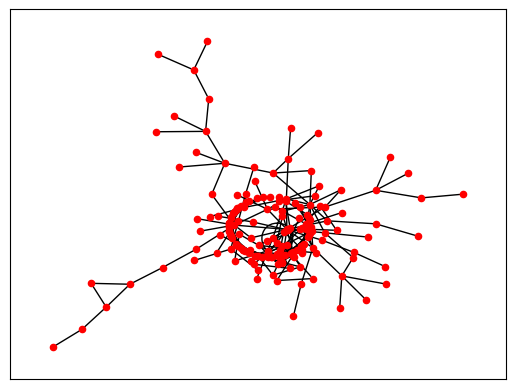

In [34]:
def visualize_graph(G):

  #pos = nx.spring_layout(G, k=.6)
  pos = nx.kamada_kawai_layout(G)
  #pos = nx.random_layout(G)
  nx.draw_networkx(G, pos=pos,
             node_size=20,
             arrows=True,
             arrowsize=0.1,
             with_labels=False,
             #width=5,
             node_color='red')
  #nx.draw_spring(G, with_labels=True)
  plt.show()

visualize_graph(G)

### Pyvis

In [35]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.6 MB/s eta 0:00:00


In [36]:
from pyvis.network import Network
from IPython.core.display import display, HTML

network = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')

node_degree = dict(G.degree)
node_labels = {}
for node in G.nodes:
    node_labels[node] = str(node)

nx.set_node_attributes(G, node_degree, 'size')
nx.set_node_attributes(G, node_labels,'label')

network.from_nx(G)
network.show("witcher.html")
display(HTML('witcher.html'))

witcher.html


In [37]:
table_23_hiv1_and_hiv2[(table_23_hiv1_and_hiv2['ID1'] == 29) & (table_23_hiv1_and_hiv2['ID2'] == 46)][['ID1','ID2','SEX1','SEX2','STREETS1','STREETS2','RACE1','RACE2','TIETYPE','ORIENT1','ORIENT2','DEALER1','DEALER2','YOB1','YOB2']]

,ID1,ID2,SEX1,SEX2,STREETS1,STREETS2,RACE1,RACE2,TIETYPE,ORIENT1,ORIENT2,DEALER1,DEALER2,YOB1,YOB2
16854,29,46,0,0,-8,-8,4,4,4,-9,-9,-8,-8,1960,1962
16855,29,46,0,0,-8,-8,4,4,1,-9,-9,-8,-8,1960,1962


In [38]:
table_1[table_1['RID'] == 29][['RID','SEX','RACE','ORIENT','YOB','STREETS']]

,RID,SEX,RACE,ORIENT,YOB,STREETS
27,29,0,4,-8,1967,0
7703,29,0,4,-9,1960,-8
13863,29,1,2,-9,1952,1
20374,29,0,2,-9,1952,0


In [39]:
network = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')

network.from_nx(G_new)
network.show("witcher.html")
display(HTML('witcher.html'))

witcher.html


In [40]:
!pip install python-louvain

In [41]:
from community import community_louvain

communities = community_louvain.best_partition(G)
nx.set_node_attributes(G, communities, 'group')

In [42]:
network = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')


node_labels = {}
for node in G.nodes:
    node_labels[node] = str(node)

nx.set_node_attributes(G, node_labels,'label')

network.from_nx(G)
network.show("witcher.html")
display(HTML('witcher.html'))

witcher.html


# Supervised feature selection

### With Positive dataset, predicting tietype

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#AGE1, AGE2 between behav and pro;;; 'MARIT1', 'MARIT2', 'EDUC1', 'EDUC2' at the end
X = table23_final[['RACE1', 'RACE2', 'ETHN1', 'ETHN2', 'SEX1', 'SEX2', 'ORIENT1', 'ORIENT2', 'BEHAV1', 'BEHAV2', 'PRO1', 'PRO2', 'PIMP1', 'PIMP2', 'JOHN1', 'JOHN2', 'DEALER1', 'DEALER2', 'DRUGMAN1', 'DRUGMAN2', 'THIEF1', 'THIEF2', 'RETIRED1', 'RETIRED2', 'HWIFE1', 'HWIFE2', 'DISABLE1', 'DISABLE2', 'UNEMP1', 'UNEMP2', 'STREETS1', 'STREETS2']]
y = table23_final['TIETYPE']
feature_names = ['RACE1', 'RACE2', 'ETHN1', 'ETHN2', 'SEX1', 'SEX2', 'ORIENT1', 'ORIENT2', 'BEHAV1', 'BEHAV2','PRO1', 'PRO2', 'PIMP1', 'PIMP2', 'JOHN1', 'JOHN2', 'DEALER1', 'DEALER2', 'DRUGMAN1', 'DRUGMAN2', 'THIEF1', 'THIEF2', 'RETIRED1', 'RETIRED2', 'HWIFE1', 'HWIFE2', 'DISABLE1', 'DISABLE2', 'UNEMP1', 'UNEMP2', 'STREETS1', 'STREETS2']
forest = RandomForestClassifier()
forest.fit(X, y)

RandomForestClassifier()

Elapsed time to compute the importances: 0.016 seconds
[0.0394228  0.05329129 0.03498773 0.04028224 0.05051996 0.04806493
 0.04334525 0.05660314 0.07207996 0.06614339 0.0421677  0.0262244
 0.00395186 0.00507316 0.00850788 0.00453841 0.0260011  0.02362524
 0.0084508  0.006693   0.01774065 0.018151   0.01376953 0.01963124
 0.02267333 0.01487673 0.0520024  0.04950682 0.04760365 0.03486384
 0.02715593 0.02205064]


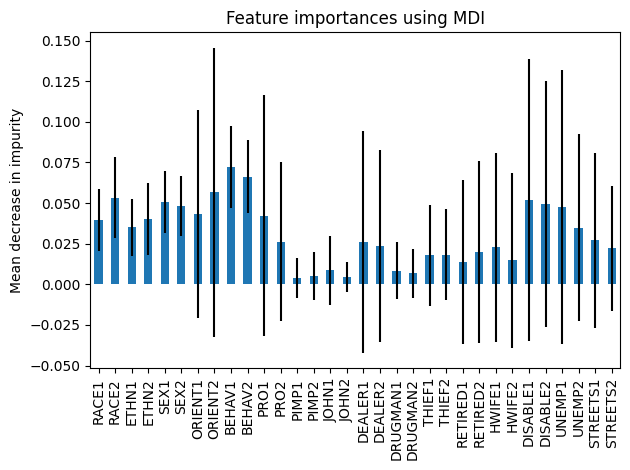

In [44]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
print(importances)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Elapsed time to compute the importances: 12.504 seconds


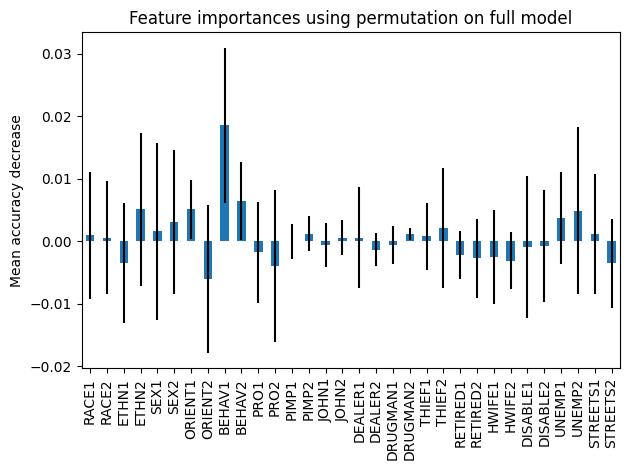

In [45]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X, y, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Weird. If you check composition of edges, percentage of values change a lot. I.e. RACE1 60% black, RACE2 25% or DISABILITY1 8% yes, DISABILITY2 2% yes or UNEMP1 70% yes, UNEMP2 10% yes

### With entire dataset, predicting HIV

Because of previous matter, here we can do a double scan! One for each ID

#### ID1 --> **HIV1**

In [46]:
#### ID1 ####

#SOME VALUES MISSING
tt = table_23[table_23['HIV1']!=' ']
X = tt[['RACE1', 'ETHN1', 'SEX1', 'ORIENT1', 'BEHAV1', 'PRO1', 'PIMP1', 'JOHN1', 'DEALER1', 'DRUGMAN1', 'THIEF1', 'RETIRED1', 'HWIFE1', 'DISABLE1', 'UNEMP1', 'STREETS1']]
y = tt['HIV1'].astype(int)
feature_names = ['RACE1', 'ETHN1', 'SEX1', 'ORIENT1', 'BEHAV1', 'PRO1', 'PIMP1', 'JOHN1', 'DEALER1', 'DRUGMAN1', 'THIEF1', 'RETIRED1', 'HWIFE1', 'DISABLE1', 'UNEMP1', 'STREETS1']
forest = RandomForestClassifier()
forest.fit(X, y)

RandomForestClassifier()

Elapsed time to compute the importances: 0.011 seconds
[0.25640623 0.02513254 0.01982318 0.0961385  0.0494487  0.1182146
 0.05587274 0.04010662 0.08672704 0.0343862  0.03104984 0.01273226
 0.02324881 0.09027387 0.04566495 0.01477391]


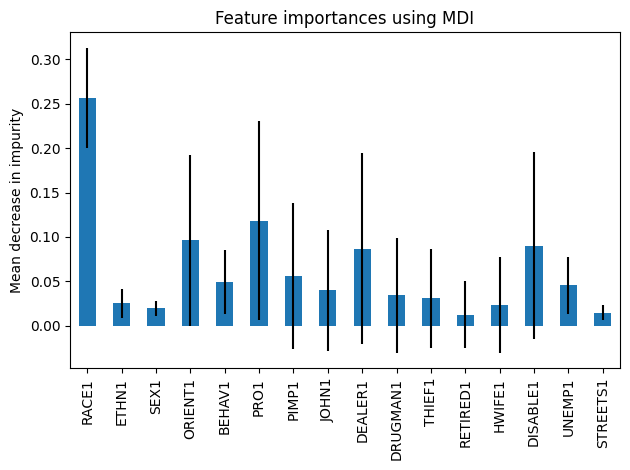

In [47]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
print(importances)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Race, disable, dealer, pro, orient

ID2 --> **HIV2**

In [48]:
#### ID2 ####
#SOME VALUES MISSING
X = table_23[['RACE2', 'ETHN2', 'SEX2', 'ORIENT2', 'BEHAV2', 'PRO2', 'PIMP2', 'JOHN2', 'DEALER2', 'DRUGMAN2', 'THIEF2', 'RETIRED2', 'HWIFE2', 'DISABLE2', 'UNEMP2', 'STREETS2']]
y = table_23['HIV2'].astype(int)
feature_names = ['RACE2', 'ETHN2', 'SEX2', 'ORIENT2', 'BEHAV2', 'PRO2', 'PIMP2', 'JOHN2', 'DEALER2', 'DRUGMAN2', 'THIEF2', 'RETIRED2', 'HWIFE2', 'DISABLE2', 'UNEMP2', 'STREETS2']
forest = RandomForestClassifier()
forest.fit(X, y)

RandomForestClassifier()

Elapsed time to compute the importances: 0.019 seconds
[0.19123445 0.01060193 0.00955642 0.15163948 0.0702031  0.10586668
 0.06839834 0.03624457 0.05678753 0.05897704 0.04879287 0.00703029
 0.01104883 0.05489101 0.10761209 0.01111536]


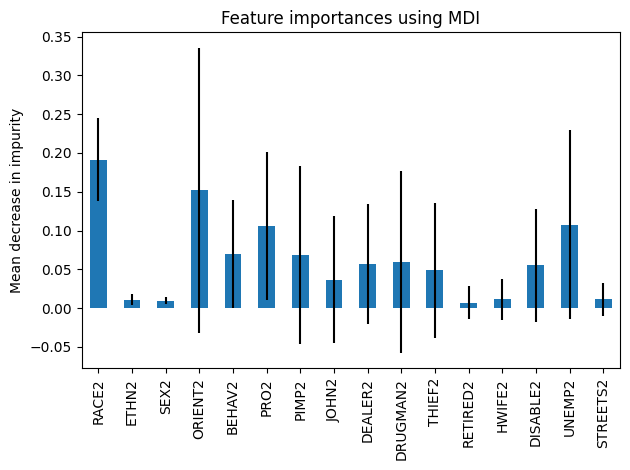

In [49]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
print(importances)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Race, orient, pro, pimp, unemp

ID1 --> **HIV2**

In [50]:
#### ID1 ####

#SOME VALUES MISSING
X = tt[['RACE1', 'ETHN1', 'SEX1', 'ORIENT1', 'BEHAV1', 'PRO1', 'PIMP1', 'JOHN1', 'DEALER1', 'DRUGMAN1', 'THIEF1', 'RETIRED1', 'HWIFE1', 'DISABLE1', 'UNEMP1', 'STREETS1']]
y = tt['HIV2'].astype(int)
feature_names = ['RACE1', 'ETHN1', 'SEX1', 'ORIENT1', 'BEHAV1', 'PRO1', 'PIMP1', 'JOHN1', 'DEALER1', 'DRUGMAN1', 'THIEF1', 'RETIRED1', 'HWIFE1', 'DISABLE1', 'UNEMP1', 'STREETS1']
forest = RandomForestClassifier()
forest.fit(X, y)

RandomForestClassifier()

Elapsed time to compute the importances: 0.017 seconds
[0.09336655 0.03365442 0.03778443 0.11002833 0.0754657  0.10521878
 0.03138394 0.02665856 0.12593939 0.02048662 0.02834553 0.02119309
 0.02309618 0.09065213 0.08971945 0.08700689]


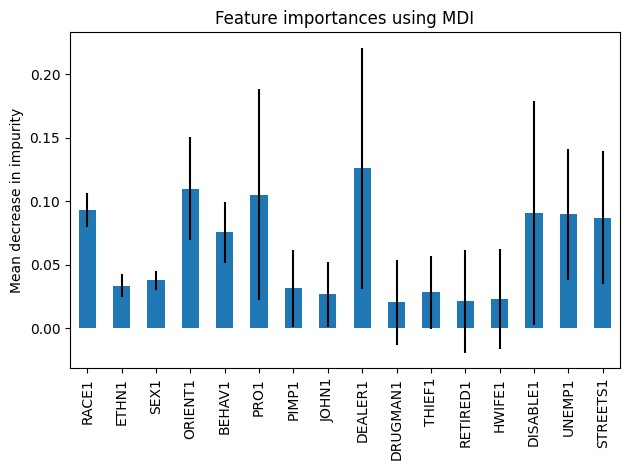

In [51]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
print(importances)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

orient, dealer, disable, pro, race

ID2 --> **HIV1**

In [52]:
#### ID2 ####
#SOME VALUES MISSING
X = tt[['RACE2', 'ETHN2', 'SEX2', 'ORIENT2', 'BEHAV2', 'PRO2', 'PIMP2', 'JOHN2', 'DEALER2', 'DRUGMAN2', 'THIEF2', 'RETIRED2', 'HWIFE2', 'DISABLE2', 'UNEMP2', 'STREETS2']]
y = tt['HIV1'].astype(int)
feature_names = ['RACE2', 'ETHN2', 'SEX2', 'ORIENT2', 'BEHAV2', 'PRO2', 'PIMP2', 'JOHN2', 'DEALER2', 'DRUGMAN2', 'THIEF2', 'RETIRED2', 'HWIFE2', 'DISABLE2', 'UNEMP2', 'STREETS2']
forest = RandomForestClassifier()
forest.fit(X, y)

RandomForestClassifier()

Elapsed time to compute the importances: 0.021 seconds
[0.25875896 0.26712402 0.01922567 0.06749974 0.04814015 0.05065668
 0.01789923 0.06010447 0.05117867 0.01247314 0.01327761 0.00994245
 0.01631729 0.04908615 0.03593369 0.02238209]


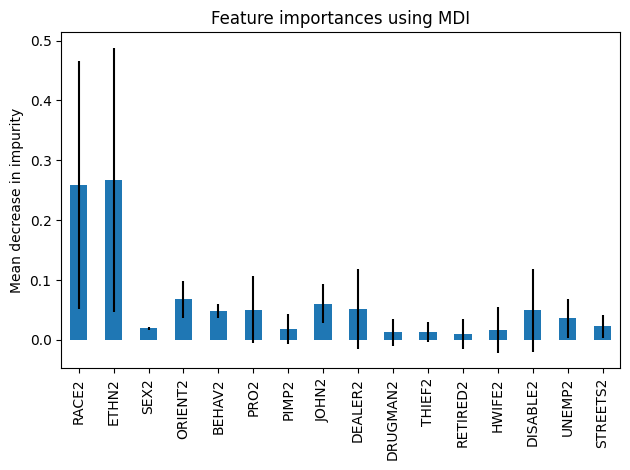

In [53]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
print(importances)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

race, ethn, orient, pro, john, dealer

## Centrality Analysis

degree centrality, eigenvector centrality, katz centrality, betweenness centrality, and closeness centrality to identify the most influential nodes within the network

### Degree Centrality

(array([167.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

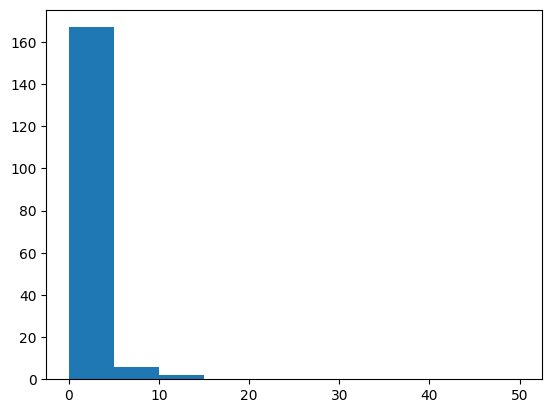

In [54]:
# Degree distribution
plt.hist([v for k,v in nx.degree(G)], range=(0,50))

In [55]:
def plot_centrality(centerality:dict):
  centrality_df = pd.DataFrame.from_dict(centerality, orient='index', columns=['centrality'])
  centrality_df.sort_values('centrality', ascending=False)[0:20].plot(kind='bar')

In [56]:
# The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1
# where n is the number of nodes in G.

degree_c = nx.degree_centrality(G)
sorted_degree_c = {k: v for k, v in sorted(degree_c.items(), key=lambda item: item[1], reverse=True)}
print(sorted_degree_c)
degree_c.items()

{29: 0.08045977011494253, 26: 0.05747126436781609, 31: 0.04597701149425287, 46: 0.034482758620689655, 102: 0.034482758620689655, 174: 0.028735632183908046, 52: 0.028735632183908046, 149: 0.028735632183908046, 21: 0.022988505747126436, 428: 0.022988505747126436, 69: 0.022988505747126436, 86: 0.022988505747126436, 91: 0.022988505747126436, 134: 0.022988505747126436, 324: 0.022988505747126436, 201099: 0.022988505747126436, 598: 0.017241379310344827, 1239: 0.017241379310344827, 61: 0.017241379310344827, 96: 0.017241379310344827, 189: 0.017241379310344827, 563: 0.017241379310344827, 359: 0.017241379310344827, 465: 0.017241379310344827, 100011: 0.017241379310344827, 200293: 0.017241379310344827, 200621: 0.017241379310344827, 200667: 0.017241379310344827, 201122: 0.017241379310344827, 201124: 0.017241379310344827, 201125: 0.017241379310344827, 10003: 0.017241379310344827, 200735: 0.017241379310344827, 480: 0.011494252873563218, 486: 0.011494252873563218, 62: 0.011494252873563218, 160: 0.01149

dict_items([(105, 0.005747126436781609), (598, 0.017241379310344827), (480, 0.011494252873563218), (486, 0.011494252873563218), (1239, 0.017241379310344827), (5218, 0.005747126436781609), (13037, 0.005747126436781609), (848, 0.005747126436781609), (823, 0.005747126436781609), (20, 0.005747126436781609), (21, 0.022988505747126436), (62, 0.011494252873563218), (25, 0.005747126436781609), (36, 0.005747126436781609), (26, 0.05747126436781609), (61, 0.017241379310344827), (27, 0.005747126436781609), (174, 0.028735632183908046), (29, 0.08045977011494253), (46, 0.034482758620689655), (160, 0.011494252873563218), (428, 0.022988505747126436), (509, 0.005747126436781609), (31, 0.04597701149425287), (45, 0.005747126436781609), (60, 0.005747126436781609), (137, 0.005747126436781609), (51, 0.005747126436781609), (96, 0.017241379310344827), (52, 0.028735632183908046), (81, 0.005747126436781609), (254, 0.011494252873563218), (63, 0.011494252873563218), (69, 0.022988505747126436), (74, 0.0057471264367

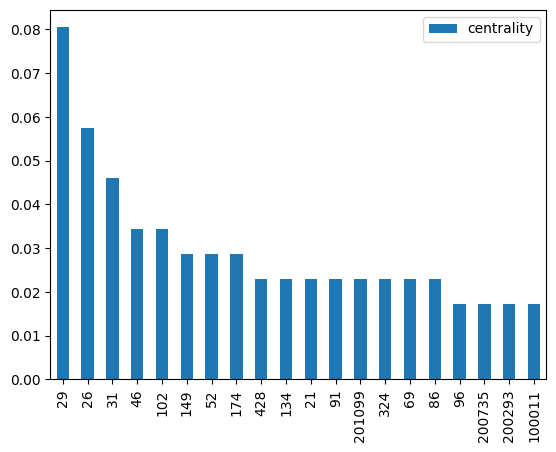

In [57]:
plot_centrality(degree_c)

In [58]:
table23_final[table23_final["ID1"]==29]

,RID,ID1,ID2,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,...,SOURCES1,BACKFIL1,OCC,OCCLOC,FRSTYR,SOURCES,STUDYNUM,YOB,YOB1,YOB2
16852,29,29,21,0,0,4,1,04-Sep-1991,05-Aug-1991,06-Feb-1991,...,19,1,,missing (out of design),1,19,2,1960,1960,1957
16853,29,29,21,0,0,1,1,04-Sep-1991,01-Jan-1901,01-Jan-1901,...,19,1,,missing (out of design),1,19,2,1960,1960,1957
16854,29,29,46,0,0,4,1,04-Sep-1991,05-Aug-1991,05-Aug-1991,...,19,1,,missing (out of design),1,19,2,1960,1960,1962
16855,29,29,46,0,0,1,1,04-Sep-1991,01-Jan-1901,01-Jan-1901,...,19,1,,missing (out of design),1,19,2,1960,1960,1962
16856,29,29,160,0,0,4,1,04-Sep-1991,19-Sep-1988,06-Jun-1991,...,19,1,,missing (out of design),1,19,2,1960,1960,1953
16857,29,29,160,0,0,1,1,04-Sep-1991,01-Jan-1901,01-Jan-1901,...,19,1,,missing (out of design),1,19,2,1960,1960,1953
16860,29,29,428,0,0,4,1,04-Sep-1991,05-Aug-1991,11-Jul-1990,...,19,1,,missing (out of design),1,19,2,1960,1960,1960
16861,29,29,428,0,0,1,1,04-Sep-1991,01-Jan-1901,01-Jan-1901,...,19,1,,missing (out of design),1,19,2,1960,1960,1960
16862,29,29,509,0,0,4,1,04-Sep-1991,04-Sep-1991,07-May-1991,...,19,1,,missing (out of design),1,19,2,1960,1960,1962
16863,29,29,509,0,0,1,1,04-Sep-1991,01-Jan-1901,01-Jan-1901,...,19,1,,missing (out of design),1,19,2,1960,1960,1962


Degree(29): 14


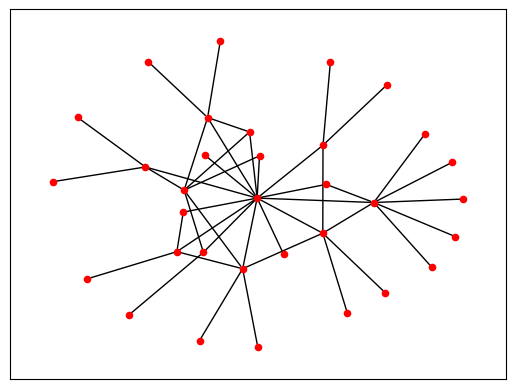

In [59]:
central_node = next(iter(sorted_degree_c.keys()))
get_node_info(G, central_node)

In [60]:
G.edges(29)

EdgeDataView([(29, 21), (29, 46), (29, 160), (29, 428), (29, 509), (29, 31), (29, 61), (29, 69), (29, 83), (29, 102), (29, 149), (29, 206), (29, 359), (29, 579)])

In [61]:
list(sorted_degree_c.keys())[0:50]

[29,
 26,
 31,
 46,
 102,
 174,
 52,
 149,
 21,
 428,
 69,
 86,
 91,
 134,
 324,
 201099,
 598,
 1239,
 61,
 96,
 189,
 563,
 359,
 465,
 100011,
 200293,
 200621,
 200667,
 201122,
 201124,
 201125,
 10003,
 200735,
 480,
 486,
 62,
 160,
 254,
 63,
 317,
 83,
 93,
 182,
 145,
 147,
 190,
 200,
 206,
 242,
 476]

Take a look at the features of the most central nodes

In [62]:
degree_nodes = table_1[table_1["RID"].isin(list(sorted_degree_c.keys())[0:50])]

In [63]:
degree_nodes["RID"]

20          21
24          26
27          29
29          31
44          46
         ...  
20831      486
20908      563
20943      598
21584     1239
29249    10003
Name: RID, Length: 161, dtype: int64

In [64]:
degree_nodes.describe()

,RID,SAMPLE,NTYPE,FRSTTYPE,IDKNOWN,LOCAL,RACE,ETHN,SEX,ORIENT,...,DEALER,DRUGMAN,THIEF,RETIRED,HWIFE,DISABLE,UNEMP,STREETS,FRSTYR,STUDYNUM
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,11041.180124,3.726708,1.360248,2.304348,-0.416149,-0.472050,0.645963,-1.372671,0.037267,-6.515528,...,-4.037267,-6.111801,-6.055901,-4.118012,-4.111801,-3.881988,-2.913043,-3.217391,1.198758,3.714286
std,44265.480621,2.734016,0.762830,0.955533,3.281690,3.316742,4.721507,3.301174,1.846917,3.723415,...,4.054146,3.407700,3.450088,4.017740,4.024913,4.222527,4.216621,4.005770,0.458529,2.375470
min,21.000000,1.000000,1.000000,1.000000,-9.000000,-8.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000,1.000000
25%,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,-9.000000,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,1.000000,2.000000
50%,160.000000,4.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,-8.000000,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,0.000000,0.000000,1.000000,3.000000
75%,324.000000,7.000000,1.000000,3.000000,1.000000,1.000000,4.000000,0.000000,1.000000,-8.000000,...,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000
max,201125.000000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,7.000000


In [65]:
G.edges(29)

EdgeDataView([(29, 21), (29, 46), (29, 160), (29, 428), (29, 509), (29, 31), (29, 61), (29, 69), (29, 83), (29, 102), (29, 149), (29, 206), (29, 359), (29, 579)])

In [66]:
table23_final[(table23_final["ID1"]==29) | (table23_final["ID2"]==29)]["DISABLE2"]

16852   -8
16853   -8
16854   -8
16855   -8
16856   -8
16857   -8
16860   -8
16861   -8
16862   -8
16863   -8
16874   -8
16875   -8
17171   -8
17172   -8
17238   -8
17239   -8
17374   -8
17375   -8
17561   -8
17562   -8
18065   -8
18066   -8
18556   -8
18557   -8
19728   -8
19729   -8
20143   -8
20144   -8
20611   -8
20612   -8
20953   -8
20954   -8
Name: DISABLE2, dtype: int64

In [67]:
tye_29 = {-9:0, -8:0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
pd.options.mode.chained_assignment = None
prova = table23_final[(table23_final["ID1"]==29) | (table23_final["ID2"]==29)]
prova['AllFeatures_tuple'] = prova[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
prova = prova.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
for j in prova["TIETYPE"]:
    tye_29[j]+=1
print(tye_29)

{-9: 0, -8: 0, 0: 0, 1: 14, 2: 0, 3: 0, 4: 14}


In [68]:
prova = table23_final[(table23_final["ID1"]==201099) | (table23_final["ID2"]==201099)]
prova

,RID,ID1,ID2,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,...,SOURCES1,BACKFIL1,OCC,OCCLOC,FRSTYR,SOURCES,STUDYNUM,YOB,YOB1,YOB2
27643,201099,201099,201122,0,0,2,1,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1959
27644,201099,201099,201122,0,0,2,0,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1959
27647,201099,201099,201124,0,0,2,1,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1956
27648,201099,201099,201124,0,0,2,0,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1956
27649,201099,201099,201125,0,0,2,1,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1959
27650,201099,201099,201125,0,0,2,0,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1959
27655,201099,201099,201126,0,0,1,1,20-May-1998,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1954
27656,201099,201099,201126,0,0,2,1,20-May-1998,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1954
27657,201099,201099,201126,0,0,2,0,20-May-1998,01-Jan-1900,01-Jan-1900,...,5,1,missing (out of design),missing (out of design),1,5,3,1968,1968,1954
27792,201125,201125,201099,0,0,2,1,01-May-1997,01-Jan-1900,01-Jan-1900,...,1,1,missing (out of design),missing (out of design),1,1,3,1959,1959,1968


In [69]:
# 29, 20, 30 --> central nodes
# 29 -> 14 edges

#### Features of central nodes

Race, disable, dealer, pro, orient

In [70]:
sex = {0: 0, 1: 0}
#0: male
#1: female
#result: all male

for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if int(j) in [0,1]:
      sex[int(j)]+=1
sex

{0: 10, 1: 0}

In [71]:
# in their 30s (between 29 and 37) (we mantain this values for both top 5 and top 10)
age = {}

for i in list(sorted_degree_c.keys())[:5]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'30': 1, '34': 2, '37': 1, '29': 1}

In [72]:
#-9: ood
#-8: not asked
#1:amer indian
#2: black
#3: asian/PIsle
#4: white
#5: other
# result: half are black, half are white (for top 10 and top 4)
race = {0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in list(sorted_degree_c.keys())[:4]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    #if int(j) in [0,1]:
      race[int(j)]+=1
race

{0: 0, 1: 0, 2: 2, 3: 0, 4: 2}

In [73]:
#ood
#result inconclusive
orient = {}

for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{'-9': 10}

In [74]:
#-8: not asked
# result inconclusive
pro = {}

for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 10}

In [75]:
#-8: not asked
# result inconclusive
disable = {}

for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 10}

In [76]:
#-8: not asked
# result inconclusive
dealer = {}

for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 10}

#### Features of connections

Tietype, race, disable, dealer, pro, orient

All the edges of the central nodes are connected by needle sharing!

In [77]:
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    tye[j]+=1
tye

{0: 1, 1: 66, 2: 0, 3: 1, 4: 66}

In [78]:
# -9: ood
# -8: not asked
# 0: heterosexual
# 1: homosexual
# 2: bisexual
# 3: undefined
orient = {}
for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "ORIENT2"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT2"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{-9: 67}

In [79]:
#-9: ood
#-8: not asked
#1:amer indian
#2: black
#3: asian/PIsle
#4: white
#5: other
race = {}
for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

{'4': 26, '2': 25, '-9': 17}

In [80]:
# -9: ood
# -8: not asked
# 0: no
# 1: yes
pro = {}
for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 67}

In [81]:
# -9: ood
# -8: not asked
# 0: no
# 1: yes
dealer = {}
for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 67}

In [82]:
# -9: ood
# -8: not asked
# 0: no
# 1: yes
# 10: undefined
disable = {}
for i in list(sorted_degree_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 67}

### Eigenvector_centrality

In [83]:
eigenvector_c = nx.eigenvector_centrality(G)
sorted_eigenvector_c = {k: v for k, v in sorted(eigenvector_c.items(), key=lambda item: item[1], reverse=True)}
print(sorted_eigenvector_c)

{29: 0.5179837309871123, 26: 0.3325432392354135, 102: 0.29936549921694566, 46: 0.2621014907837517, 149: 0.23105579525251002, 31: 0.22870170216569205, 359: 0.2130121609927294, 69: 0.19628959941679047, 21: 0.18421449143029692, 428: 0.18155664150424067, 61: 0.17455040928316914, 206: 0.16750686380094487, 160: 0.14705478873958935, 83: 0.14067146389745763, 357: 0.12445173813857799, 91: 0.10660534937540697, 509: 0.10201357182649266, 579: 0.10201357182649266, 396: 0.10124960047615507, 86: 0.0866790577904399, 63: 0.08648943093510944, 52: 0.06231943159515513, 200: 0.052047805875680024, 137: 0.051619064481486746, 159: 0.051619064481486746, 62: 0.0485536661739889, 147: 0.04734156102143366, 145: 0.04694406526798106, 120: 0.045041216913096704, 285: 0.045041216913096704, 617: 0.045041216913096704, 134: 0.040536445581290714, 177: 0.03865789207096497, 20: 0.03628011361644679, 254: 0.03576399976594955, 174: 0.035572609590679254, 90: 0.017071347730439362, 640: 0.017071347730439362, 81: 0.0122735525575421

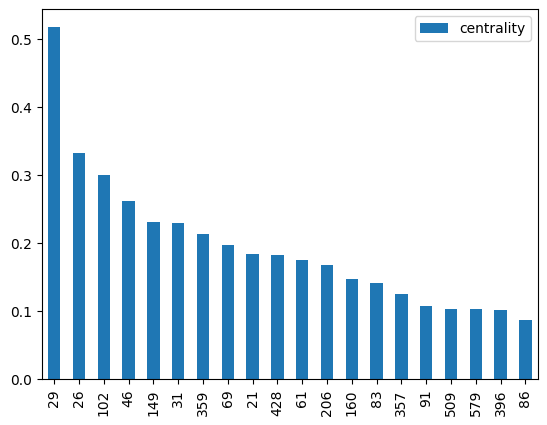

In [84]:
plot_centrality(eigenvector_c)

#### Features of central nodes

Race, disable, dealer, pro, orient

In [85]:
# all men
sex = {}


for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if int(j) in sex.keys():
      sex[int(j)]+=1
    else:
      sex[int(j)]=1
sex

{0: 9, -9: 1}

In [86]:
#all in their 30s except for outlier 92 and one 42
age = {}

for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'30': 1, '34': 3, '29': 1, '42': 1, '37': 1, '92': 1, '35': 1, '32': 1}

In [87]:
# half white half black
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    #if int(j) in [0,1]:
      race[int(j)]+=1
race

{-9: 1, 0: 0, 1: 0, 2: 4, 3: 0, 4: 5}

In [88]:
# inconclusive
orient = {}

for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{'-9': 10}

In [89]:
# inconclusive
pro = {}

for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 10}

In [90]:
# inconclusive
disable = {}

for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 10}

In [91]:
# inconclusive
dealer = {}

for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 10}

#### Features of connections

Tietype, race, disable, dealer, pro, orient

All the edges of the central nodes are connected by needle sharing!

In [92]:
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    tye[j]+=1
tye

{0: 1, 1: 63, 2: 0, 3: 0, 4: 63}

In [93]:
# inconclusive
orient = {}
for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "ORIENT2"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT2"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{-9: 64}

In [94]:
#-9: ood
#-8: not asked
#1:amer indian
#2: black
#3: asian/PIsle
#4: white
#5: other

race = {}
for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

{'4': 24, '2': 24, '-9': 17}

In [95]:
# inconclusive
pro = {}
for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 64}

In [96]:
# inconclusive
dealer = {}
for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 64}

In [97]:
# inconclusive
disable = {}
for i in list(sorted_eigenvector_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 64}

### Katz (PageRank) Centrality

In [98]:
katz_c = nx.katz_centrality(G)
sorted_katz_c = {k: v for k, v in sorted(katz_c.items(), key=lambda item: item[1], reverse=True)}
print(sorted_katz_c)

{29: 0.20511792995080894, 26: 0.15892355409212386, 31: 0.13678417984538851, 102: 0.13517816109271477, 46: 0.12959216192792097, 149: 0.12133591785730062, 21: 0.1080505176964445, 428: 0.10777285627731532, 69: 0.10673044433192845, 359: 0.10563358877231407, 61: 0.10086283792802672, 91: 0.10041537721440748, 174: 0.09728759570364674, 52: 0.09702962938476915, 86: 0.09395355902318767, 206: 0.09350002912803851, 160: 0.09128610575990043, 201099: 0.08841637485735315, 134: 0.08829419721945952, 83: 0.08828073675958081, 324: 0.08734820633360176, 357: 0.08650608208123953, 396: 0.08376556798859883, 63: 0.08302983047203007, 201122: 0.0824220443587613, 201124: 0.0824220443587613, 201125: 0.0824220443587613, 200293: 0.08156571143765062, 200621: 0.08156571143765062, 200667: 0.08156571143765062, 200735: 0.08156571143765062, 200: 0.08050313887697853, 563: 0.07963432222445596, 189: 0.07950755477609762, 10003: 0.07867089496567488, 145: 0.07806093456747634, 1239: 0.07800716146434127, 100011: 0.0780071614643412

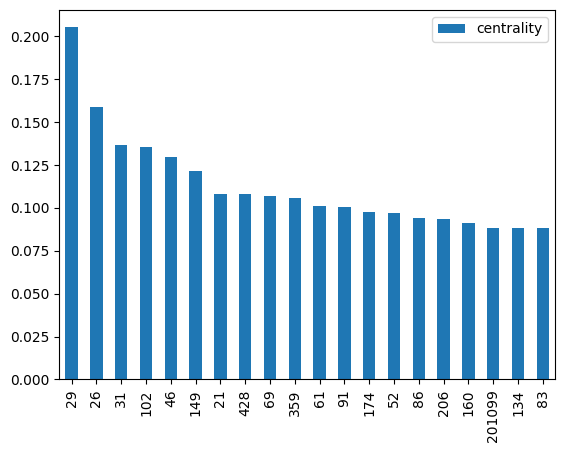

In [99]:

plot_centrality(katz_c)


#### Features of central nodes

Race, disable, dealer, pro, orient

In [100]:
sex = {0: 0, 1: 0}
# all men
for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if int(j) in [0,1]:
      sex[int(j)]+=1
sex

{0: 9, 1: 0}

In [101]:
# all between 29 and 42 except one 92 (in their 30x)
age = {}

for i in list(sorted_katz_c.keys())[:5]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'30': 1, '34': 2, '37': 1, '29': 1}

In [102]:
#-9: ood
#-8: not asked
#1:amer indian
#2: black
#3: asian/PIsle
#4: white
#5: other
# half black half white
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in list(sorted_katz_c.keys())[:5]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    #if int(j) in [0,1]:
      race[int(j)]+=1
race

{-9: 0, 0: 0, 1: 0, 2: 3, 3: 0, 4: 2}

In [103]:
# inconclusive
orient = {}

for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{'-9': 10}

In [104]:
# inconclusive
pro = {}

for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 10}

In [105]:
# inconclusive
disable = {}

for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 10}

In [106]:
# inconclusive
dealer = {}

for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 10}

#### Features of connections

Tietype, race, disable, dealer, pro, orient

All the edges of the central nodes are connected by needle sharing!

In [107]:
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
# all needle sharing
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    tye[j]+=1
tye

{0: 1, 1: 63, 2: 0, 3: 0, 4: 63}

In [108]:
# inconclusive
orient = {}
for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{'-9': 10}

In [109]:
# half black half white
race = {}
for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

{'4': 5, '2': 4, '-9': 1}

In [110]:
# inconclusive
pro = {}
for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) ]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 10}

In [111]:
# inconclusive
dealer = {}
for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 10}

In [112]:
# inconclusive
disable = {}
for i in list(sorted_katz_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 10}

### Closeness_centrality

In [113]:
closeness_c = nx.closeness_centrality(G)
sorted_closeness_c = {k: v for k, v in sorted(closeness_c.items(), key=lambda item: item[1], reverse=True)}
print(sorted_closeness_c)

{29: 0.12579445571331982, 31: 0.11685823754789272, 46: 0.113148452228912, 26: 0.10910743607787944, 149: 0.10800534076396145, 102: 0.10692528735632184, 21: 0.10482871309443317, 359: 0.10431735351836277, 61: 0.10281277630415563, 160: 0.10281277630415563, 428: 0.10087291260030362, 206: 0.10087291260030362, 200: 0.09946538358727612, 91: 0.099004895700298, 69: 0.09764866425234871, 174: 0.09504469987228609, 396: 0.09504469987228609, 83: 0.0937941117160718, 509: 0.0929785107446277, 579: 0.0929785107446277, 145: 0.09257600636910981, 357: 0.09257600636910981, 86: 0.09217697185889814, 63: 0.08873467830400153, 120: 0.08800435173359823, 285: 0.08800435173359823, 617: 0.08800435173359823, 52: 0.08623007044864665, 137: 0.08588376494483682, 159: 0.08588376494483682, 62: 0.08452591885875245, 147: 0.08353538074712644, 20: 0.08100400557297109, 134: 0.08100400557297109, 254: 0.0803949528994901, 324: 0.07833354385078524, 177: 0.07664895150990814, 437: 0.07610340737104758, 27: 0.07503528937285743, 146: 0.0

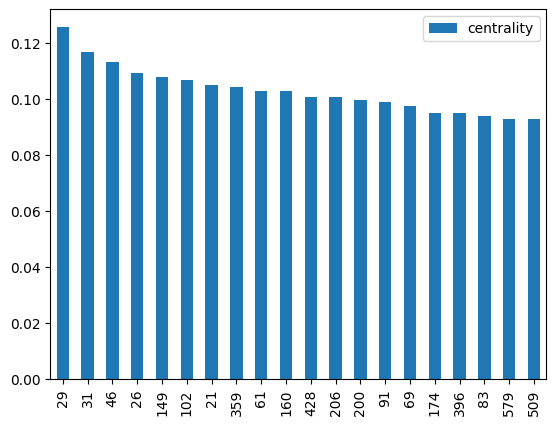

In [114]:
plot_centrality(closeness_c)

#### Features of central nodes

Race, disable, dealer, pro, orient

In [115]:
# all men
sex = {0: 0, 1: 0}

for i in list(sorted_closeness_c.keys())[:5]:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if int(j) in [0,1]:
      sex[int(j)]+=1
sex

{0: 5, 1: 0}

In [116]:
# in 30s (29-42)
age = {}

for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'30': 1, '37': 1, '29': 1, '34': 3, '42': 1, '92': 1, '36': 1, '38': 1}

In [117]:
#-9: ood
#-8: not asked
#1:amer indian
#2: black
#3: asian/PIsle
#4: white
#5: other
# half white half black
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in list(sorted_closeness_c.keys())[:4]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    #if int(j) in [0,1]:
      race[int(j)]+=1
race

{-9: 0, 0: 0, 1: 0, 2: 2, 3: 0, 4: 2}

In [118]:
# inconclusive
orient = {}

for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{'-9': 10}

In [119]:
# inconclusive
pro = {}

for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 10}

In [120]:
# inconclusive
disable = {}

for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 10}

In [121]:
# inconclusive
dealer = {}

for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 10}

#### Features of connections

Tietype, race, disable, dealer, pro, orient

All the edges of the central nodes are connected by needle sharing!

In [128]:
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    tye[j]+=1
tye

{0: 1, 1: 60, 2: 0, 3: 0, 4: 60}

In [129]:
# inconclusive
orient = {}
for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "ORIENT2"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT2"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{-9: 61}

In [130]:
#-9: ood
#-8: not asked
#1:amer indian
#2: black
#3: asian/PIsle
#4: white
#5: other
race = {}
for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1' "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

KeyError: ignored

In [131]:
pro = {}
for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 61}

In [132]:
dealer = {}
for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 61}

In [133]:

disable = {}
for i in list(sorted_closeness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 61}

### Betweenness Centrality

In [134]:
betweenness_c = nx.betweenness_centrality(G)
sorted_betweenness_c = {k: v for k, v in sorted(betweenness_c.items(), key=lambda item: item[1], reverse=True)}
print(sorted_betweenness_c)

{29: 0.05110705611502901, 31: 0.04621785927845326, 174: 0.03336433902509246, 26: 0.025207020996337322, 324: 0.022523420370739483, 149: 0.022029333071788722, 145: 0.021925453458241977, 428: 0.0199765242619538, 91: 0.01935917879210683, 437: 0.01860341505547804, 200: 0.01655482470710695, 134: 0.015480698956879941, 563: 0.015148495116603546, 46: 0.015023127714975435, 102: 0.01224830286022233, 52: 0.011981485172635262, 182: 0.011560693641618497, 86: 0.008932460322733392, 61: 0.008187506393605654, 96: 0.007906451398578167, 189: 0.007840010630522889, 21: 0.007766714862588888, 69: 0.004186295695165538, 254: 0.003986446083316723, 93: 0.003986446083316723, 147: 0.003986446083316723, 643: 0.003986446083316723, 396: 0.0026576307222111488, 62: 0.0005315261444422297, 465: 0.00046508537638695097, 488: 0.0003986446083316723, 10229: 0.0003986446083316723, 10239: 0.0003986446083316723, 206: 0.0003474957630827672, 359: 0.0003474957630827672, 476: 0.00026576307222111485, 10003: 0.00026576307222111485, 102

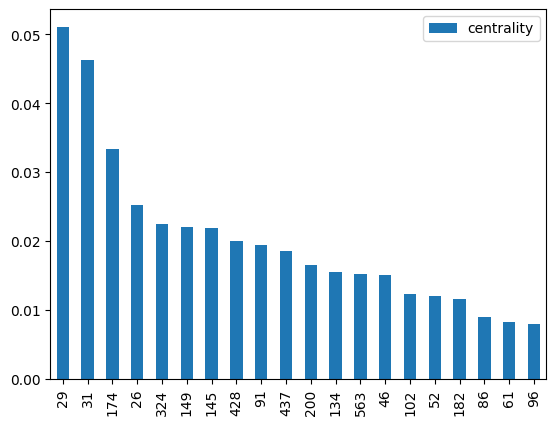

In [135]:
plot_centrality(betweenness_c)

#### Features of central nodes

Race, disable, dealer, pro, orient

In [136]:
sex = {0: 0, 1: 0}

for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df['ID1'],df['SEX1'])
  for j in df["SEX1"]:
    if int(j) in [0,1]:
      sex[int(j)]+=1
sex


16852    29
Name: ID1, dtype: int64 16852    0
Name: SEX1, dtype: object
16874    31
Name: ID1, dtype: int64 16874    0
Name: SEX1, dtype: object
18287    174
Name: ID1, dtype: int64 18287    0
Name: SEX1, dtype: object
16803    26
Name: ID1, dtype: int64 16803    0
Name: SEX1, dtype: object
19484    324
Name: ID1, dtype: int64 19484    0
Name: SEX1, dtype: object
18063    149
Name: ID1, dtype: int64 18063    0
Name: SEX1, dtype: object
18012    145
Name: ID1, dtype: int64 18012    0
Name: SEX1, dtype: object
20143    428
Name: ID1, dtype: int64 20143    0
Name: SEX1, dtype: object
17461    91
Name: ID1, dtype: int64 17461    1
Name: SEX1, dtype: object
20227    437
Name: ID1, dtype: int64 20227    0
Name: SEX1, dtype: object


{0: 9, 1: 1}

In [137]:
age = {}

for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'30': 1, '37': 1, '42': 2, '34': 1, '40': 2, '41': 1, '32': 1, '25': 1}

In [138]:
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    #if int(j) in [0,1]:
      race[int(j)]+=1
race

{-9: 0, 0: 0, 1: 0, 2: 5, 3: 0, 4: 5}

In [139]:
orient = {}

for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{'-9': 10}

In [140]:
pro = {}

for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 10}

In [141]:
disable = {}

for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 10}

In [142]:
dealer = {}

for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 10}

#### Features of connections

Tietype, race, disable, dealer, pro, orient

All the edges of the central nodes are connected by needle sharing!

In [143]:
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    tye[j]+=1
tye

{0: 1, 1: 57, 2: 0, 3: 0, 4: 57}

In [144]:
# inconclusive
orient = {}
for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "ORIENT2"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT2"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{-9: 58}

In [145]:
race = {}
for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

{'4': 26, '2': 19, '-9': 14}

In [146]:
# inconclusive
pro = {}
for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if j not in pro.keys():
      pro[j]=1
    else:
      pro[j]+=1
pro

{'-8': 58}

In [147]:
# inconclusive
dealer = {}
for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if j not in dealer.keys():
      dealer[j]=1
    else:
      dealer[j]+=1
dealer

{'-8': 58}

In [148]:
# inconclusive
disable = {}
for i in list(sorted_betweenness_c.keys())[:10]:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if j not in disable.keys():
      disable[j]=1
    else:
      disable[j]+=1
disable

{'-8': 58}

## Group of nodes

Cliques, Cores, and Components

for all the elements of the core, we check the features to get an idea of their characteristic...

I.e. TIETYPE: 4 --> all the core/clique have transmitted the disease because of that

--> check how the network change if we disregard them (i.e. calculating the summed degree of the clique to check how many nodes are influenced by them)

### Cliques

clique is a set of nodes within an undirected network such
that every member of the set is connected by an edge to every other.

NB: Clique is subset of cores

Task:
Clique Characteristics:

Once you identify cliques, analyze their characteristics. This could include:
Size of cliques: How many individuals are in each clique?
Density: What percentage of possible connections within a clique is realized?
Duration: How long do individuals stay within a clique before transmission occurs?

Central Individuals:
Identify individuals who serve as central nodes within cliques. These individuals may have a higher likelihood of transmitting the virus or may act as connectors between different cliques.

In [149]:
cliques = nx.find_cliques(G)
print(f"The number of cliques: {len([i for i in cliques])}")

cliques = nx.find_cliques(G)
print(f"The number of cliques with more than and equal three nodes: {len([i for i in cliques if len(i) >= 3])}")

The number of cliques: 126
The number of cliques with more than and equal three nodes: 18


In [150]:
# It's an iterator: must be reset everytime
cliques = nx.find_cliques(G)
cliques_U3 = [i for i in cliques if len(i) >= 3]

In [151]:
cliques_U3

[[26, 357, 102],
 [26, 359, 149],
 [26, 91, 63],
 [29, 160, 31],
 [29, 69, 83],
 [29, 69, 102],
 [29, 359, 149],
 [29, 46, 428],
 [29, 46, 102],
 [29, 46, 31],
 [200735, 200667, 200293, 200621],
 [563, 189, 190],
 [200274, 201617, 100011],
 [600, 760, 764],
 [1239, 480, 486],
 [10003, 10005, 10004],
 [10077, 10162, 10164],
 [201099, 201122, 201124, 201125]]

In [152]:
cliques_U4 = [i for i in cliques_U3 if len(i)==4]

In [153]:
cliques_U4

[[200735, 200667, 200293, 200621], [201099, 201122, 201124, 201125]]

In [154]:
table_1[table_1['RID']==102]['SEX']

97       1
7775     0
13936    1
20447    0
Name: SEX, dtype: int64

In [155]:
table_23[(table_23['ID1'] == 357) & (table_23['ID2'] ==26) ][['ID1','ID2','SEX1','SEX2','RACE1','RACE2','TIETYPE']]

,ID1,ID2,SEX1,SEX2,RACE1,RACE2,TIETYPE
19711,357,26,1,0,2,2,4
19712,357,26,1,0,2,2,1


#### Features of clique #1 (4 nodes)  

note: as the graph is symmetry there is no need to check ID2 and vice versa.

Race, disable, dealer, pro, orient

TIETYPE: 1 is social, 2 drug!

In [156]:
# drug
import itertools

tie = {}
for i in itertools.permutations(cliques_U4[0], 2):
  df = table_23_hiv1_and_hiv2[(table_23_hiv1_and_hiv2["ID1"]==i[0]) & (table_23_hiv1_and_hiv2["ID2"]==i[1])]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2']].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    if int(j) not in tie.keys():
      tie[j]=1
    else:
      tie[j]+=1
tie

{1: 7, 2: 5}

In [157]:
#half males half females
sex = {0: 0, 1: 0}

for i in cliques_U4[0]:
  df = table_23_hiv1_and_hiv2[table_23_hiv1_and_hiv2["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if int(j) in [0,1]:
      sex[int(j)]+=1
  # Check symmetry
  # df = table_23_hiv1_and_hiv2[table_23_hiv1_and_hiv2["ID2"]==i]
  # df['AllFeatures_tuple'] = df[['ID2', "SEX2"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  # df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  # for j in df["SEX2"]:
  #   if int(j) in [0,1]:
  #     sex[int(j)]+=1
sex

{0: 2, 1: 2}

In [158]:
#from 27 to 45
age = {}

for i in cliques_U4[0]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1

age

{'29': 1, '42': 1, '43': 2, '45': 1}

In [159]:
# bla
# 2: blck , 4: white
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in cliques_U4[0]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
      race[int(j)]+=1

race

{-9: 0, 0: 0, 1: 0, 2: 3, 3: 0, 4: 1}

In [160]:
# 0: Heterosexual (p:34.8) , 2: Bisexual (p:1%)
# p(B) = p(d_x) * p(c_x) =  1/100 * 1/4 = 1/400 = 0.0025
# p(H) = p(d_y) * p(c_y) = 35/100 * 3/4 = 0.26
# However, the precentage of p(B) or Bisexual is so less but it happened in clique(Complete graph)
orient = {}

for i in cliques_U4[0]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if int(j) not in orient.keys():
      orient[int(j)]=1
    else:
      orient[int(j)]+=1

orient

{2: 1, 0: 3}

In [161]:
pro = {}
# no prostitute
for i in cliques_U4[0]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if int(j) not in pro.keys():
      pro[int(j)]=1
    else:
      pro[int(j)]+=1
pro

{0: 4}

In [162]:
disable = {}
# half were diasble!
# chatgpt !?
for i in cliques_U4[0]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

{0: 2, 1: 2}

In [163]:
dealer = {}

for i in cliques_U4[0]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if int(j) not in dealer.keys():
      dealer[int(j)]=1
    else:
      dealer[int(j)]+=1
dealer

{0: 4}

#### Features of clique #2 (4 nodes)

Features depend on Random Forest = Race, disable, dealer, pro, orient

In [164]:
import itertools
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
tie = {}
for i in itertools.permutations(cliques_U4[1], 2):
  df = table23_final[(table23_final["ID1"]==i[0]) & (table23_final["ID2"]==i[1])]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2']].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    if int(j) not in tie.keys():
      tie[j]=1
    else:
      tie[j]+=1
tie

{2: 4, 1: 6}

In [165]:
sex = {0: 0, 1: 0}

for i in cliques_U4[1]:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if int(j) in [0,1]:
      sex[int(j)]+=1
sex

{0: 4, 1: 0}

In [166]:
age = {}

for i in cliques_U4[1]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'28': 1, '29': 1, '37': 2, '40': 1}

In [167]:
# All black
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in cliques_U4[1]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    #if int(j) in [0,1]:
      race[int(j)]+=1
race

{-9: 0, 0: 0, 1: 0, 2: 4, 3: 0, 4: 0}

In [168]:
orient = {}

for i in cliques_U4[1]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if int(j) not in orient.keys():
      orient[int(j)]=1
    else:
      orient[int(j)]+=1
orient

{1: 3, 0: 1}

In [169]:
pro = {}

for i in cliques_U4[1]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if int(j) not in pro.keys():
      pro[int(j)]=1
    else:
      pro[int(j)]+=1
pro

{0: 3, 1: 1}

In [170]:
disable = {}

for i in cliques_U4[1]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

{1: 2, 0: 2}

In [171]:
dealer = {}

for i in cliques_U4[1]:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if int(j) not in dealer.keys():
      dealer[int(j)]=1
    else:
      dealer[int(j)]+=1
dealer

{0: 4}

### cliques (3 nodes)

In [172]:
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for c in range(len(cliques_U3)):
    for i in cliques_U3[c]:
      df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
      df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
      df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
      for j in df["TIETYPE"]:
        tye[j]+=1
tye

{0: 4, 1: 271, 2: 44, 3: 14, 4: 243}

In [173]:
# it can be predicted

sex = {0: 0, 1: 0}

for c in range(len(cliques_U3)):
    for i in cliques_U3[c]:
      df = table23_final[table23_final["ID1"]==i]
      df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
      df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
      for j in df["SEX1"]:
        if int(j) in [0,1]:
          sex[int(j)]+=1
sex

{0: 42, 1: 10}

In [174]:
# black (23.2%) and white(8.1%), asian(12.0%)
# although asian has more participatian in this research but white has more chance to get HIV!
race = {}
for c in range(len(cliques_U3)):
    for i in cliques_U3[c]:
      df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
      df['AllFeatures_tuple'] = df[['ID1', 'ID2', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
      df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
      for j in df["RACE1"]:
        if int(j) not in race.keys():
          race[int(j)]=1
        else:
          race[int(j)]+=1
race

{2: 117, 4: 120, -9: 57, 3: 3}

In [175]:
# orient == 1 ??

orient = {}
for c in range(len(cliques_U3)):
    for i in cliques_U3[c]:
      df = table23_final[(table23_final["ID1"]==i)]
      df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
      df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
      for j in df["ORIENT1"]:
        if int(j) not in orient.keys():
          orient[int(j)]=1
        else:
          orient[int(j)]+=1
orient

{-9: 36, 2: 2, 0: 9, -8: 3, 1: 6}

In [176]:
# 27-34 most effected

age = {}
for c in range(len(cliques_U3)):
    for i in cliques_U3[c]:
      df = table23_final[(table23_final["ID1"]==i)]
      df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
      df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
      for j in df["AGE1"]:
        if j not in age.keys():
          age[j]=1
        else:
          age[j]+=1
age

{'34': 6,
 '42': 4,
 '92': 3,
 '25': 1,
 '28': 2,
 '30': 8,
 '38': 1,
 '37': 5,
 '35': 4,
 '91': 1,
 '29': 7,
 '32': 2,
 '43': 3,
 '45': 2,
 '44': 1,
 '50': 1,
 '54': 1,
 '51': 1,
 '5': 1,
 '33': 1,
 '27': 1,
 '36': 1,
 '24': 1,
 '18': 1,
 '20': 1,
 '40': 1}

In [177]:
disable = {}

for c in range(len(cliques_U3)):
    for i in cliques_U3[c]:
      df = table23_final[(table23_final["ID1"]==i)]
      df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
      df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
      for j in df["DISABLE1"]:
        if int(j) not in disable.keys():
          disable[int(j)]=1
        else:
          disable[int(j)]+=1
disable

{-8: 36, 0: 10, 1: 10}

In [178]:

pro = {}
for c in range(len(cliques_U3)):
    for i in cliques_U3[c]:
      df = table23_final[(table23_final["ID1"]==i)]
      df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
      df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
      for j in df["PRO1"]:
        if int(j) not in pro.keys():
          pro[int(j)]=1
        else:
          pro[int(j)]+=1
pro

{-8: 36, 0: 16, 1: 4}

### Cores

There's a self loop, maybe a bug? (ID 200851)

In [179]:
G.remove_edges_from(nx.selfloop_edges(G))

In [180]:
kcore = nx.k_core(G)
two_core = nx.k_core(G,2)
three_core = nx.k_core(G,3)
four_core = nx.k_core(G,4)

In [181]:
kcore_nodes = [i for i in kcore]
two_core = [i for i in two_core]
three_core = [i for i in three_core]
four_core = [i for i in four_core]

In [182]:
[i for i in three_core]

[201122, 201124, 200293, 201125, 201099, 200621, 200667, 200735]

In [183]:
import itertools
def make_subgraph(node_list:list):
    edges = []
    for i in itertools.permutations(node_list, 2):
        df = table_23_hiv1_and_hiv2[(table_23_hiv1_and_hiv2["ID1"]==i[0]) & (table_23_hiv1_and_hiv2["ID2"]==i[1])]
       #print(df.head(1)[['ID1','ID2']])
        if not df.empty:
            edges.append(set(df[['ID1', 'ID2']].iloc[0]))

    return edges

In [184]:
print(three_core)

G_c3 = nx.Graph()
G_c3 = nx.from_edgelist(make_subgraph(three_core))
# visualize_graph(G_c3)

from pyvis.network import Network
from IPython.core.display import display, HTML

network = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')

node_degree = dict(G_c2.degree)
node_labels = {}
for node in G_c3.nodes:
    node_labels[node] = str(node)

nx.set_node_attributes(G_c3, node_degree, 'size')
nx.set_node_attributes(G_c3, node_labels,'label')

network.from_nx(G_c3)
network.show("witcher.html")
display(HTML('witcher.html'))

[201122, 201124, 200293, 201125, 201099, 200621, 200667, 200735]


NameError: ignored

In [ ]:
print(two_core)

G_c2 = nx.Graph()
G_c2 = nx.from_edgelist(make_subgraph(two_core))
# visualize_graph(G_c2)
from pyvis.network import Network
from IPython.core.display import display, HTML

network = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')

node_degree = dict(G_c2.degree)
node_labels = {}
for node in G_c2.nodes:
    node_labels[node] = str(node)

nx.set_node_attributes(G_c2, node_degree, 'size')
nx.set_node_attributes(G_c2, node_labels,'label')

network.from_nx(G_c2)
network.show("witcher.html")
display(HTML('witcher.html'))

In [185]:
three_core

[201122, 201124, 200293, 201125, 201099, 200621, 200667, 200735]

In [186]:
table_23[(table_23['ID1'] == 201122) & (table_23['ID2'] == 201124)]

,RID,ID1,ID2,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,...,SOURCES1,BACKFIL1,OCC,OCCLOC,FRSTYR,SOURCES,STUDYNUM,YOB,YOB1,YOB2
88638,201099,201122,201124,-1,1,1,1,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,3,0,missing (out of design),missing (out of design),1,5,3,1968,1959,1956
88639,201099,201122,201124,-1,1,2,1,25-Apr-1997,01-Jan-1900,01-Jan-1900,...,3,0,missing (out of design),missing (out of design),1,5,3,1968,1959,1956


#### Features of k-core nodes

Race, disable, dealer, pro, orient

TIETYPE: 1 is social, 2 drug!

In [187]:
import itertools

tie = {}
for i in itertools.permutations(kcore_nodes, 2):
  df = table23_final[(table23_final["ID1"]==i[0]) & (table23_final["ID2"]==i[1])]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2']].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    if int(j) not in tie.keys():
      tie[j]=1
    else:
      tie[j]+=1
tie

{1: 13, 2: 9}

In [188]:
sex = {0: 0, 1: 0}

for i in kcore_nodes:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if int(j) in [0,1]:
      sex[int(j)]+=1
sex

{0: 6, 1: 2}

In [189]:
age = {}

for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'37': 2, '40': 1, '43': 2, '28': 1, '29': 2, '45': 1, '42': 1}

In [190]:
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }

for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    #if int(j) in [0,1]:
      race[int(j)]+=1
race

{-9: 0, 0: 0, 1: 0, 2: 7, 3: 0, 4: 1}

In [191]:
orient = {}

for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "ORIENT1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT1"]:
    if int(j) not in orient.keys():
      orient[int(j)]=1
    else:
      orient[int(j)]+=1
orient

{1: 3, 0: 4, 2: 1}

In [192]:
pro = {}

for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if int(j) not in pro.keys():
      pro[int(j)]=1
    else:
      pro[int(j)]+=1
pro

{0: 7, 1: 1}

In [193]:
disable = {}

for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

{1: 4, 0: 4}

In [194]:
dealer = {}

for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if int(j) not in dealer.keys():
      dealer[int(j)]=1
    else:
      dealer[int(j)]+=1
dealer

{0: 8}

#### Features of connections of k-core nodes

Tietype, race, disable, dealer, pro, orient

All the edges of the central nodes are connected by needle sharing!

In [195]:
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["TIETYPE"]:
    tye[j]+=1
tye

{0: 0, 1: 17, 2: 25, 3: 0, 4: 0}

In [196]:
orient = {}
for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "ORIENT2"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["ORIENT2"]:
    if j not in orient.keys():
      orient[j]=1
    else:
      orient[j]+=1
orient

{1: 10, 0: 19, 2: 6}

In [197]:
race = {}
for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["RACE1"]:
    if int(j) not in race.keys():
      race[int(j)]=1
    else:
      race[int(j)]+=1
race

{2: 25, 4: 6}

In [198]:
pro = {}
for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "PRO1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["PRO1"]:
    if int(j) not in pro.keys():
      pro[int(j)]=1
    else:
      pro[int(j)]+=1
pro

{0: 25, 1: 6}

In [199]:
dealer = {}
for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DEALER1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DEALER1"]:
    if int(j) not in dealer.keys():
      dealer[int(j)]=1
    else:
      dealer[int(j)]+=1
dealer

{0: 25}

In [200]:
disable = {}
for i in kcore_nodes:
  df = table23_final[(table23_final["ID1"]==i) | (table23_final["ID2"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', 'ID2', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

{1: 21, 0: 18}

## Community Detection

 identifying clusters or communities within the network. This can help identify groups with higher interactions and possibly higher transmission rates.

In [201]:


# check what it's
#number of triangols of which each node is a part, it will probably find most central nodes, for example 29 is a part of 7 triangles
# (29:7, 46:3, 102:3, 31:2, 69:2, 149:2, 359:2)
nx.triangles(G)

{105: 0,
 598: 0,
 480: 1,
 486: 1,
 1239: 1,
 5218: 0,
 13037: 0,
 848: 0,
 823: 0,
 20: 0,
 21: 0,
 62: 0,
 25: 0,
 36: 0,
 26: 3,
 61: 0,
 27: 0,
 174: 0,
 29: 7,
 46: 3,
 160: 1,
 428: 1,
 509: 0,
 31: 2,
 45: 0,
 60: 0,
 137: 0,
 51: 0,
 96: 0,
 52: 0,
 81: 0,
 254: 0,
 63: 1,
 69: 2,
 74: 0,
 317: 0,
 76: 0,
 83: 1,
 90: 0,
 86: 0,
 91: 1,
 93: 0,
 98: 0,
 134: 0,
 103: 0,
 182: 0,
 102: 3,
 120: 0,
 130: 0,
 145: 0,
 146: 0,
 149: 2,
 147: 0,
 159: 0,
 324: 0,
 177: 0,
 187: 0,
 275: 0,
 189: 1,
 563: 1,
 190: 1,
 199: 0,
 203: 0,
 200: 0,
 206: 0,
 223: 0,
 231: 0,
 242: 0,
 244: 0,
 255: 0,
 476: 0,
 279: 0,
 293: 0,
 280: 0,
 246: 0,
 282: 0,
 285: 0,
 305: 0,
 320: 0,
 322: 0,
 323: 0,
 327: 0,
 356: 0,
 329: 0,
 172: 0,
 344: 0,
 345: 0,
 357: 1,
 359: 2,
 396: 0,
 437: 0,
 460: 0,
 308: 0,
 465: 0,
 488: 0,
 493: 0,
 472: 0,
 473: 0,
 478: 0,
 519: 0,
 481: 0,
 484: 0,
 490: 0,
 497: 0,
 503: 0,
 513: 0,
 529: 0,
 579: 0,
 580: 0,
 715: 0,
 595: 0,
 667: 0,
 600: 1,
 760: 

A low transitivity of 0.19 indicates that there is relatively low clustering or triadic closure in your network. In other words, when Node A is connected to Node B and Node C, there is a lower likelihood that Nodes B and C are directly connected to each other. This suggests a more decentralized or loosely connected network structure.

In social networks, higher transitivity can indicate the presence of tightly-knit communities or groups where friends of a friend are likely to be friends. Conversely, lower transitivity may suggest a more dispersed network where connections are less likely to form closed triangles.

In [202]:
nx.transitivity(G)

0.19889502762430938

In [203]:
nx.clustering(G)

{105: 0,
 598: 0,
 480: 1.0,
 486: 1.0,
 1239: 0.3333333333333333,
 5218: 0,
 13037: 0,
 848: 0,
 823: 0,
 20: 0,
 21: 0,
 62: 0,
 25: 0,
 36: 0,
 26: 0.06666666666666667,
 61: 0,
 27: 0,
 174: 0,
 29: 0.07692307692307693,
 46: 0.2,
 160: 1.0,
 428: 0.16666666666666666,
 509: 0,
 31: 0.07142857142857142,
 45: 0,
 60: 0,
 137: 0,
 51: 0,
 96: 0,
 52: 0,
 81: 0,
 254: 0,
 63: 1.0,
 69: 0.3333333333333333,
 74: 0,
 317: 0,
 76: 0,
 83: 1.0,
 90: 0,
 86: 0,
 91: 0.16666666666666666,
 93: 0,
 98: 0,
 134: 0,
 103: 0,
 182: 0,
 102: 0.2,
 120: 0,
 130: 0,
 145: 0,
 146: 0,
 149: 0.2,
 147: 0,
 159: 0,
 324: 0,
 177: 0,
 187: 0,
 275: 0,
 189: 0.3333333333333333,
 563: 0.3333333333333333,
 190: 1.0,
 199: 0,
 203: 0,
 200: 0,
 206: 0,
 223: 0,
 231: 0,
 242: 0,
 244: 0,
 255: 0,
 476: 0,
 279: 0,
 293: 0,
 280: 0,
 246: 0,
 282: 0,
 285: 0,
 305: 0,
 320: 0,
 322: 0,
 323: 0,
 327: 0,
 356: 0,
 329: 0,
 172: 0,
 344: 0,
 345: 0,
 357: 1.0,
 359: 0.6666666666666666,
 396: 0,
 437: 0,
 460: 0,


In [204]:
nx.average_clustering(G)

0.1618001046572475

In [205]:
nx.square_clustering(G)

{105: 0,
 598: 0,
 480: 0.0,
 486: 0.0,
 1239: 0.0,
 5218: 0,
 13037: 0,
 848: 0,
 823: 0,
 20: 0,
 21: 0.078125,
 62: 0.0,
 25: 0,
 36: 0,
 26: 0.08648648648648649,
 61: 0.12195121951219512,
 27: 0,
 174: 0.0,
 29: 0.04708520179372197,
 46: 0.03875968992248062,
 160: 0.058823529411764705,
 428: 0.03225806451612903,
 509: 0,
 31: 0.02142857142857143,
 45: 0,
 60: 0,
 137: 0,
 51: 0,
 96: 0.0,
 52: 0.0,
 81: 0,
 254: 0.0,
 63: 0.0,
 69: 0.0392156862745098,
 74: 0,
 317: 0.0,
 76: 0,
 83: 0.07692307692307693,
 90: 0,
 86: 0.043478260869565216,
 91: 0.020833333333333332,
 93: 0.0,
 98: 0,
 134: 0.0,
 103: 0,
 182: 0.0,
 102: 0.06493506493506493,
 120: 0,
 130: 0,
 145: 0.0,
 146: 0,
 149: 0.04672897196261682,
 147: 0.0,
 159: 0,
 324: 0.0,
 177: 0,
 187: 0,
 275: 0,
 189: 0.0,
 563: 0.0,
 190: 0.0,
 199: 0,
 203: 0,
 200: 0.0,
 206: 0.29411764705882354,
 223: 0,
 231: 0,
 242: 0.0,
 244: 0,
 255: 0,
 476: 0.0,
 279: 0,
 293: 0,
 280: 0,
 246: 0,
 282: 0,
 285: 0,
 305: 0,
 320: 0,
 322: 0

## Reciprocity and Assortativity
https://networkx.org/documentation/stable/reference/algorithms/assortativity.html

In [206]:
nx.reciprocity(G)

0.0

In [207]:
nx.overall_reciprocity(G)

0.0

In [208]:
nx.degree_assortativity_coefficient(G)

0.13249434907447025

A low degree Pearson correlation coefficient of 0.13 indicates a relatively weak positive correlation between the degrees of connected nodes. In simpler terms, nodes with similar degrees are somewhat more likely to be connected, but the relationship is not very strong.

In [209]:
nx.degree_pearson_correlation_coefficient(G)

0.13249434907447002

## Path Analysis

 pathways of transmission within the network. Identify common paths or nodes that are heavily involved in transmission.

In [210]:
nx.is_connected(G)

False

In [211]:
print(nx.connected_components(G))
components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
big_comp = []
for idx,g in enumerate(components,start=1):
    print(f"Component {idx}: Nodes: {g.nodes()} Edges: {g.edges()}")
    if len(g.nodes())>4:
      print(len(g.nodes))
      big_comp.append(g)


<generator object connected_components at 0x7aedb942a6c0>
Component 1: Nodes: [105, 5218, 13037, 598] Edges: [(105, 598), (5218, 598), (13037, 598)]
Component 2: Nodes: [480, 3769, 486, 1239] Edges: [(480, 486), (480, 1239), (3769, 1239), (486, 1239)]
Component 3: Nodes: [848, 823] Edges: [(848, 823)]
Component 4: Nodes: [640, 513, 130, 643, 134, 137, 396, 529, 145, 147, 20, 21, 149, 146, 282, 26, 27, 285, 29, 31, 160, 159, 428, 46, 174, 177, 305, 563, 52, 437, 182, 51, 61, 62, 63, 189, 190, 579, 324, 69, 323, 200, 76, 206, 81, 83, 86, 90, 91, 603, 93, 96, 98, 357, 102, 359, 103, 617, 367, 120, 509, 254] Edges: [(640, 86), (513, 52), (130, 134), (643, 189), (643, 367), (134, 93), (134, 282), (134, 428), (137, 46), (396, 26), (396, 428), (529, 52), (145, 31), (145, 437), (147, 149), (147, 603), (20, 21), (21, 62), (21, 26), (21, 29), (149, 26), (149, 29), (149, 52), (149, 359), (146, 174), (26, 61), (26, 63), (26, 91), (26, 102), (26, 206), (26, 357), (26, 359), (27, 174), (285, 31), (2

In [212]:
len(components)

44

In [220]:
dims = [j.number_of_nodes() for j in big_comp]
print(dims)
bigG = big_comp[0]
NG= bigG.nodes
EG= bigG.edges
big1 = big_comp[1]
N1= big1.nodes
E1= big1.edges
big2 = big_comp[2]
N2= big2.nodes
E2= big2.edges
big3 = big_comp[3]
N3= big3.nodes
E3= big3.edges
big4 = big_comp[4]
N4= big4.nodes
E4= big4.edges

[62, 6, 5, 5, 6]


In [239]:
print(NG)
print(N1)
print(N2)
print(N3)
print(N4)


[640, 513, 130, 643, 134, 137, 396, 529, 145, 147, 20, 21, 149, 146, 282, 26, 27, 285, 29, 31, 160, 159, 428, 46, 174, 177, 305, 563, 52, 437, 182, 51, 61, 62, 63, 189, 190, 579, 324, 69, 323, 200, 76, 206, 81, 83, 86, 90, 91, 603, 93, 96, 98, 357, 102, 359, 103, 617, 367, 120, 509, 254]
[488, 490, 493, 465, 476, 255]
[201122, 201124, 201125, 201126, 201099]
[10091, 10092, 10003, 10004, 10005]
[10243, 10256, 10227, 10229, 10237, 10239]


In [221]:
# -9: ood
# -8: not asked
# 0: other
# 1: social
# 2: drug
# 3: sexual
# 4: needle
# path 0 (big)
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for n,m in EG:
    df = table23_final[((table23_final["ID1"]==n) & (table23_final["ID2"]==m))| ((table23_final["ID1"]==m) & (table23_final["ID2"]==n)) ]
    df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
    df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
    for j in df["TIETYPE"]:
      tye[j]+=1
tye

{0: 4, 1: 76, 2: 0, 3: 3, 4: 76}

In [245]:
# path 1
print(E1)
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for n,m in E1:
    df = table23_final[((table23_final["ID1"]==n) & (table23_final["ID2"]==m))| ((table23_final["ID1"]==m) & (table23_final["ID2"]==n)) ]
    df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
    df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
    print(df[['ID1','ID2','TIETYPE']])
    for j in df["TIETYPE"]:
      tye[j]+=1
tye

[(488, 465), (488, 476), (490, 465), (493, 465), (476, 255)]
       ID1  ID2  TIETYPE
20388  465  488        4
20389  465  488        1
       ID1  ID2  TIETYPE
20501  488  476        4
20502  488  476        1
       ID1  ID2  TIETYPE
20503  490  465        4
20504  490  465        1
       ID1  ID2  TIETYPE
20390  465  493        4
20391  465  493        1
       ID1  ID2  TIETYPE
18915  255  476        4
18916  255  476        1


{0: 0, 1: 5, 2: 0, 3: 0, 4: 5}

In [246]:
# path 2
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for n,m in E2:
    df = table23_final[((table23_final["ID1"]==n) & (table23_final["ID2"]==m))| ((table23_final["ID1"]==m) & (table23_final["ID2"]==n)) ]
    df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
    df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
    print(df[['ID1','ID2','TIETYPE']])
    for j in df["TIETYPE"]:
      tye[j]+=1
tye

          ID1     ID2  TIETYPE
27643  201099  201122        2
          ID1     ID2  TIETYPE
88638  201122  201124        1
88639  201122  201124        2
          ID1     ID2  TIETYPE
88640  201122  201125        1
88641  201122  201125        2
          ID1     ID2  TIETYPE
27647  201099  201124        2
          ID1     ID2  TIETYPE
88688  201124  201125        1
88689  201124  201125        2
          ID1     ID2  TIETYPE
27649  201099  201125        2
          ID1     ID2  TIETYPE
27655  201099  201126        1
27656  201099  201126        2


{0: 0, 1: 4, 2: 7, 3: 0, 4: 0}

In [247]:
# path 3
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for n,m in E3:
    df = table23_final[((table23_final["ID1"]==n) & (table23_final["ID2"]==m))| ((table23_final["ID1"]==m) & (table23_final["ID2"]==n)) ]
    df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
    df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
    print(df[['ID1','ID2','TIETYPE']])
    for j in df["TIETYPE"]:
      tye[j]+=1
tye

         ID1    ID2  TIETYPE
38654  10091  10092        4
         ID1    ID2  TIETYPE
38670  10092  10003        4
38671  10092  10003        2
         ID1    ID2  TIETYPE
37563  10003  10004        4
37564  10003  10004        3
37565  10003  10004        2
37566  10003  10004        1
         ID1    ID2  TIETYPE
37567  10003  10005        4
37568  10003  10005        3
37569  10003  10005        2
37570  10003  10005        1
          ID1    ID2  TIETYPE
37597   10004  10005        4
37598   10004  10005        2
113987  10004  10005        1
113988  10004  10005        3


{0: 0, 1: 3, 2: 4, 3: 3, 4: 5}

In [249]:
# path 4
tye = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
print(E4)
for n,m in E4:
    df = table23_final[((table23_final["ID1"]==n) & (table23_final["ID2"]==m))| ((table23_final["ID1"]==m) & (table23_final["ID2"]==n)) ]
    df['AllFeatures_tuple'] = df[['ID1', 'ID2', "TIETYPE"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
    df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
    print(df[['ID1','ID2','TIETYPE']])
    for j in df["TIETYPE"]:
      tye[j]+=1
tye

[(10243, 10227), (10256, 10237), (10227, 10229), (10229, 10239), (10237, 10239)]
         ID1    ID2  TIETYPE
40827  10243  10227        2
40828  10243  10227        1
         ID1    ID2  TIETYPE
40687  10237  10256        3
40688  10237  10256        2
         ID1    ID2  TIETYPE
40573  10229  10227        2
         ID1    ID2  TIETYPE
40733  10239  10229        2
40734  10239  10229        1
         ID1    ID2  TIETYPE
40685  10237  10239        2
40686  10237  10239        1


{0: 0, 1: 3, 2: 5, 3: 1, 4: 0}

In [226]:
# age path 0
age = {}
for i in NG:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

{'92': 13,
 '38': 3,
 '37': 2,
 '40': 5,
 '41': 1,
 '91': 7,
 '34': 3,
 '42': 4,
 '30': 6,
 '32': 3,
 '29': 3,
 '31': 1,
 '36': 1,
 '33': 1,
 '28': 1,
 '35': 1,
 '25': 1,
 '44': 1}

In [250]:
# age path 1
age = {}
print(N1)
for i in N1:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

[488, 490, 493, 465, 476, 255]


{'36': 1, '92': 2, '37': 1, '44': 1}

In [251]:
# age path 2
age = {}
print(N2)
for i in N2:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

[201122, 201124, 201125, 201126, 201099]


{'37': 2, '40': 1, '28': 1, '29': 1}

In [271]:
# age path 3
age = {}

print(N3)
for i in N3:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1',"AGE1"]])
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

[10091, 10092, 10003, 10004, 10005]
         ID1 AGE1
38654  10091   35
         ID1 AGE1
38670  10092   34
         ID1 AGE1
37563  10003   27
         ID1 AGE1
37593  10004   24
         ID1 AGE1
37606  10005   35
37610  10005   36


{'35': 2, '34': 1, '27': 1, '24': 1, '36': 1}

In [270]:
# age path 4
age = {}

print(N4)
for i in N4:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "AGE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1',"AGE1"]])
  for j in df["AGE1"]:
    if j not in age.keys():
      age[j]=1
    else:
      age[j]+=1
age

[10243, 10256, 10227, 10229, 10237, 10239]
         ID1 AGE1
40827  10243   35
Empty DataFrame
Columns: [ID1, AGE1]
Index: []
Empty DataFrame
Columns: [ID1, AGE1]
Index: []
         ID1 AGE1
40573  10229   45
         ID1 AGE1
40685  10237   37
         ID1 AGE1
40733  10239   36


{'35': 1, '45': 1, '37': 1, '36': 1}

In [265]:
# 2: blck , 4: white
# race path big
race = { }
print(NG)
for i in NG:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1','RACE1']])
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

[640, 513, 130, 643, 134, 137, 396, 529, 145, 147, 20, 21, 149, 146, 282, 26, 27, 285, 29, 31, 160, 159, 428, 46, 174, 177, 305, 563, 52, 437, 182, 51, 61, 62, 63, 189, 190, 579, 324, 69, 323, 200, 76, 206, 81, 83, 86, 90, 91, 603, 93, 96, 98, 357, 102, 359, 103, 617, 367, 120, 509, 254]
       ID1 RACE1
21272  640    -9
       ID1 RACE1
20628  513    -9
       ID1 RACE1
17850  130     4
       ID1 RACE1
21288  643    -9
       ID1 RACE1
17893  134     4
Empty DataFrame
Columns: [ID1, RACE1]
Index: []
       ID1 RACE1
19957  396     4
       ID1 RACE1
20705  529    -9
       ID1 RACE1
18012  145     4
Empty DataFrame
Columns: [ID1, RACE1]
Index: []
       ID1 RACE1
16715   20    -9
       ID1 RACE1
16738   21     4
       ID1 RACE1
18063  149     2
       ID1 RACE1
18019  146    -9
       ID1 RACE1
19113  282    -9
       ID1 RACE1
16803   26     2
       ID1 RACE1
16813   27    -9
       ID1 RACE1
19135  285    -9
       ID1 RACE1
16852   29     4
       ID1 RACE1
16874   31     2
   

{'-9': 20, '4': 28, '2': 9}

In [272]:
# race path 1
# 2: blck , 4: white
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }
print(N1)
for i in N1:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1','RACE1']])
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

[488, 490, 493, 465, 476, 255]
       ID1 RACE1
20501  488     2
       ID1 RACE1
20503  490    -9
       ID1 RACE1
20527  493     2
       ID1 RACE1
20388  465     2
Empty DataFrame
Columns: [ID1, RACE1]
Index: []
       ID1 RACE1
18915  255    -9


{-9: 0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, '2': 3, '-9': 2}

In [267]:
# race path 2
race = {}
print(N2)
for i in N2:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1','RACE1']])
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

[201122, 201124, 201125, 201126, 201099]
          ID1 RACE1
88638  201122     2
          ID1 RACE1
88684  201124     2
          ID1 RACE1
27792  201125     2
Empty DataFrame
Columns: [ID1, RACE1]
Index: []
          ID1 RACE1
27643  201099     2


{2: 2, '2': 2}

In [268]:
# race path 3
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }
print(N3)
for i in N3:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1','RACE1']])
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

[10091, 10092, 10003, 10004, 10005]
         ID1 RACE1
38654  10091     4
         ID1 RACE1
38670  10092     4
         ID1 RACE1
37563  10003     4
         ID1 RACE1
37593  10004     4
         ID1 RACE1
37606  10005     4


{-9: 0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, '4': 5}

In [269]:
# race path 4
race = {-9:0, 0: 0, 1: 0, 2: 0 , 3:0, 4:0 }
print(N4)
for i in N4:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "RACE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1','RACE1']])
  for j in df["RACE1"]:
    if j not in race.keys():
      race[j]=1
    else:
      race[j]+=1
race

[10243, 10256, 10227, 10229, 10237, 10239]
         ID1 RACE1
40827  10243     4
Empty DataFrame
Columns: [ID1, RACE1]
Index: []
Empty DataFrame
Columns: [ID1, RACE1]
Index: []
         ID1 RACE1
40573  10229     2
         ID1 RACE1
40685  10237     2
         ID1 RACE1
40733  10239     2


{-9: 0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, '4': 1, '2': 3}

In [284]:
# sex path 0
sex = {}
#0: male
#1: female
#result: all male
print(NG)
for i in NG:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if j not in sex.keys():
      sex[j]=1
    else:
      sex[j]+=1
sex

[640, 513, 130, 643, 134, 137, 396, 529, 145, 147, 20, 21, 149, 146, 282, 26, 27, 285, 29, 31, 160, 159, 428, 46, 174, 177, 305, 563, 52, 437, 182, 51, 61, 62, 63, 189, 190, 579, 324, 69, 323, 200, 76, 206, 81, 83, 86, 90, 91, 603, 93, 96, 98, 357, 102, 359, 103, 617, 367, 120, 509, 254]


{'-9': 20, '0': 27, '1': 10}

In [278]:
# sex path 1
#result: all male
sex = {}
print(N1)
for i in N1:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if j not in sex.keys():
      sex[j]=1
    else:
      sex[j]+=1
sex

[488, 490, 493, 465, 476, 255]


{'0': 3, '-9': 2}

In [285]:
# sex path 2
#result: all male
sex = {}
print(N2)
for i in N2:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  print(df[['ID1','SEX1']])
  for j in df["SEX1"]:
    if j not in sex.keys():
      sex[j]=1
    else:
      sex[j]+=1
sex

[201122, 201124, 201125, 201126, 201099]
          ID1 SEX1
88638  201122    0
          ID1 SEX1
88684  201124    0
          ID1 SEX1
27792  201125    0
Empty DataFrame
Columns: [ID1, SEX1]
Index: []
          ID1 SEX1
27643  201099    0


{0: 2, '0': 2}

In [281]:
# sex path 3
#result: all male
sex = {}
print(N3)
for i in N3:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if j not in sex.keys():
      sex[j]=1
    else:
      sex[j]+=1
sex

[10091, 10092, 10003, 10004, 10005]


{'0': 5}

In [283]:
# sex path 4
#result: all male
sex = {}
print(N4)
for i in N4:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "SEX1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["SEX1"]:
    if j not in sex.keys():
      sex[j]=1
    else:
      sex[j]+=1
sex

[10243, 10256, 10227, 10229, 10237, 10239]


{'0': 4}

In [290]:
# studynum path 0
# 2: Bushwick SFHR

studynum = {}
print(NG)
for i in NG:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "STUDYNUM"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["STUDYNUM"]:
    if j not in studynum.keys():
      studynum[j]=1
    else:
      studynum[j]+=1
studynum

[640, 513, 130, 643, 134, 137, 396, 529, 145, 147, 20, 21, 149, 146, 282, 26, 27, 285, 29, 31, 160, 159, 428, 46, 174, 177, 305, 563, 52, 437, 182, 51, 61, 62, 63, 189, 190, 579, 324, 69, 323, 200, 76, 206, 81, 83, 86, 90, 91, 603, 93, 96, 98, 357, 102, 359, 103, 617, 367, 120, 509, 254]


{2: 57}

In [291]:
# studynum path 1 first 6-node
# 2: Bushwick SFHR

studynum = {}
print(N1)
for i in N1:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "STUDYNUM"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["STUDYNUM"]:
    if j not in studynum.keys():
      studynum[j]=1
    else:
      studynum[j]+=1
studynum

[488, 490, 493, 465, 476, 255]


{2: 5}

In [292]:
# studynum path 2 first 5-node
# 3: Atlanta Urban

studynum = {}
print(N2)
for i in N2:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "STUDYNUM"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["STUDYNUM"]:
    if j not in studynum.keys():
      studynum[j]=1
    else:
      studynum[j]+=1
studynum

[201122, 201124, 201125, 201126, 201099]


{3: 4}

In [293]:
# studynum path 3 second 5-node
# 3: Houston

studynum = {}
print(N3)
for i in N3:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "STUDYNUM"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["STUDYNUM"]:
    if j not in studynum.keys():
      studynum[j]=1
    else:
      studynum[j]+=1
studynum

[10091, 10092, 10003, 10004, 10005]


{6: 5}

In [294]:
# studynum path 4 second 6-node
# 3: Houston

studynum = {}
print(N4)
for i in N4:
  df = table23_final[table23_final["ID1"]==i]
  df['AllFeatures_tuple'] = df[['ID1', "STUDYNUM"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["STUDYNUM"]:
    if j not in studynum.keys():
      studynum[j]=1
    else:
      studynum[j]+=1
studynum

[10243, 10256, 10227, 10229, 10237, 10239]


{6: 4}

In [345]:
#path 0
#0: no
#1:yes
disable = {}
print(NG)
for i in NG:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

[640, 513, 130, 643, 134, 137, 396, 529, 145, 147, 20, 21, 149, 146, 282, 26, 27, 285, 29, 31, 160, 159, 428, 46, 174, 177, 305, 563, 52, 437, 182, 51, 61, 62, 63, 189, 190, 579, 324, 69, 323, 200, 76, 206, 81, 83, 86, 90, 91, 603, 93, 96, 98, 357, 102, 359, 103, 617, 367, 120, 509, 254]


{-8: 57}

In [346]:
#path 1 first 6-node
#0: no
#1:yes
disable = {}
print(N1)
for i in N1:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

[488, 490, 493, 465, 476, 255]


{-8: 5}

In [347]:
#path 2 first 5-node
#0: no
#1:yes
disable = {}
print(N2)
for i in N2:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

[201122, 201124, 201125, 201126, 201099]


{1: 2, 0: 2}

In [348]:
#path 3 second 5-node
#0: no
#1:yes
disable = {}
print(N3)
for i in N3:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

[10091, 10092, 10003, 10004, 10005]


{1: 3, 0: 2}

In [349]:
#path 4 second 6-node
#0: no
#1:yes
disable = {}
print(N4)
for i in N4:
  df = table23_final[(table23_final["ID1"]==i)]
  df['AllFeatures_tuple'] = df[['ID1', "DISABLE1"]].apply(lambda x: tuple(sorted(map(str, x))), axis=1)
  df = df.drop_duplicates(subset='AllFeatures_tuple').drop(columns='AllFeatures_tuple')
  for j in df["DISABLE1"]:
    if int(j) not in disable.keys():
      disable[int(j)]=1
    else:
      disable[int(j)]+=1
disable

[10243, 10256, 10227, 10229, 10237, 10239]


{1: 3, 0: 1}

## Homophily and Assortative Mixing

https://networkx.org/documentation/stable/reference/algorithms/assortativity.html

## Small worldness

Examine if the network exhibits the small-worldness property, which would indicate the presence of short paths between individuals, facilitating the rapid spread of the virus. Determining whether the network exhibits small-worldness is critical: if confirmed, it implies that even with a large network, transmission pathways are relatively short, which can accelerate HIV spread. Understanding this property can inform strategies to disrupt transmission chains.

Only first 5 biggest sub-graphs.

In [ ]:
sigmas =[]
for g in big_comp:
  sigmas.append(nx.sigma(g, seed=42))

In [ ]:
omegas ={}
for d, g in zip(dims, big_comp):
  try:
    omegas[g] = [d, nx.omega(g, seed=42)]
  except:
    omegas[g] = [d, 'nan']
    continue

In [ ]:
sigmas

[1.597686375321337, nan, 1.0000000000000002, 1.6274509803921569, nan]

In [ ]:
omegas

{<networkx.classes.graph.Graph at 0x7986af40e410>: [62, -0.15223182986679118],
 <networkx.classes.graph.Graph at 0x7986af40fe20>: [6, 'nan'],
 <networkx.classes.graph.Graph at 0x7986af40df60>: [5, 2.220446049250313e-16],
 <networkx.classes.graph.Graph at 0x7986af40f0a0>: [5, -0.03529411764705881],
 <networkx.classes.graph.Graph at 0x7986af40e620>: [6, 'nan']}

### Check consequences of clean needle on graph with negative nodes

In [306]:
table_23_hiv1_and_hiv2['TIETYPE']

3674      1
3675      3
3676      4
10359     1
10360     3
         ..
114020    4
114027    1
114028    4
117613    1
117616    1
Name: TIETYPE, Length: 512, dtype: int64

In [336]:
tie = {}
df = table_23_hiv1_or_hiv2[((table_23_hiv1_or_hiv2["HIV1"]==1) & (table_23_hiv1_or_hiv2["HIV2"]==0))|((table_23_hiv1_or_hiv2["HIV1"]==1) & (table_23_hiv1_or_hiv2["HIV2"]==0))]
for j in df['TIETYPE']:
  if j not in tie.keys():
    tie[j]=1
  else:
    tie[j]+=1

tie

{1: 221, 2: 211, 3: 14, 4: 6}

In [339]:
# count needle sharing/drug tietype btween most central hiv positive nodes and hiv negative nodes
all = cliques_U4[0] + cliques_U4[1] + list(sorted_betweenness_c.keys())[:10]
tmp = 0
for i in all:
  df = table_23_hiv1_or_hiv2[((table_23_hiv1_or_hiv2["ID1"]==i) & (table_23_hiv1_or_hiv2["HIV2"]==0))|((table_23_hiv1_or_hiv2["HIV1"]==0) & (table_23_hiv1_or_hiv2["ID2"]==i))]
  for j in df['TIETYPE']:
    if j in [2,4]:
      tmp +=1
tmp

184

In [343]:
# count disable tietype btween most central nodes
all = cliques_U4[0] + cliques_U4[1] + list(sorted_betweenness_c.keys())[:10]
tmp = 0
for i in all:
  df = table_23_hiv1_or_hiv2[((table_23_hiv1_or_hiv2["ID1"]==i) & (table_23_hiv1_or_hiv2["DISABLE2"]==1) & (table_23_hiv1_or_hiv2["HIV2"]==0))|(((table_23_hiv1_or_hiv2["HIV2"]==0) & table_23_hiv1_or_hiv2["DISABLE1"]==1) & (table_23_hiv1_or_hiv2["ID2"]==i))]
  for j in df['TIETYPE']:
    if j in [2,4]:
      tmp +=1
tmp

24

In [296]:
all = cliques_U4[0] + cliques_U4[1] + list(sorted_betweenness_c.keys())[:10]
tmp = 0
tie = {}
for edges in table_23_hiv1_or_hiv2:
   for i in all:
      if i == edges['ID1']:
         if edges['HIV2'] == 0:
            if edges['TIETYPE'] in [2,4]:
              tmp +=1
      if i == edges['ID2']:
         if edges['HIV1'] == 0:
            if edges['TIETYPE'] in [2,4]:
              tmp +=1

TypeError: ignored

# Further Tasks

## Epidemiological Modeling
 Apply epidemiological models like SIR (Susceptible, Infected, Recovered) or SEIR (Susceptible, Exposed, Infected, Recovered) to simulate and predict the spread of HIV within the network.
 https://jckantor.github.io/CBE30338/03.09-COVID-19.html

 ## Supervised Learning
 If you have labeled data (e.g., known cases of transmission), consider using supervised learning algorithms to predict potential transmission paths or high-risk nodes.

input: subset of selected features
output: tietype